<a href="https://colab.research.google.com/github/MayerT1/AIA_Project/blob/main/AIA_Project_Meta_model_approach_SERVIR_SCO_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Meta Model approach


In [1]:
import ee
import geemap
ee.Authenticate()
ee.Initialize(project='servir-ee')
Map = geemap.Map()

In [2]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 83.4 MB/s eta 0:00:00


In [3]:
!pip install shap

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow.keras import layers, models

import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import tree
import shap

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from osgeo import gdal, osr, ogr
import cv2
import os
import rasterio
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier


from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import StackingRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from subprocess import check_output


from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


from mlxtend.evaluate import cochrans_q
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Colab_workspace
# /content/drive/MyDrive/sample_partition
!ls

/content/drive/MyDrive/Colab_workspace
classification_map.tif		stackedResampled_chunk_37.tif  stackedResampled_chunk_70.tif
class.tif			stackedResampled_chunk_38.tif  stackedResampled_chunk_71.tif
LandsatComposite_2022.tif	stackedResampled_chunk_39.tif  stackedResampled_chunk_72.tif
output_2d_tiff.tif		stackedResampled_chunk_3.tif   stackedResampled_chunk_73.tif
output_33_band_tiff.tif		stackedResampled_chunk_40.tif  stackedResampled_chunk_74.tif
output_tiff_no_nans.tif		stackedResampled_chunk_41.tif  stackedResampled_chunk_75.tif
reassembled_image.tif		stackedResampled_chunk_42.tif  stackedResampled_chunk_76.tif
stackedResampled_chunk_100.tif	stackedResampled_chunk_43.tif  stackedResampled_chunk_77.tif
stackedResampled_chunk_10.tif	stackedResampled_chunk_44.tif  stackedResampled_chunk_78.tif
stackedResampled_chunk_11.tif	stackedResampled_chunk_45.tif  stackedResampled_chunk_79.tif
stackedResampled_chunk_12.tif	stackedResampled_chunk_46.tif  stackedResampled_chunk_7.tif
stackedResample

# Data handeling

In [7]:
train=pd.read_csv("Wheat_training.csv")
print("Train dataset has {} samples and {} attributes".format(*train.shape))

train_copy = train.copy()
train_copy


Train dataset has 3000 samples and 37 attributes


,system:index,MNDWI_HLS,MNDWI_LS,NDBI_HLS,NDBI_LS,NDMI_HLS,NDMI_LS,NDWI_HLS,NDWI_LS,S2_EVI,...,greenness,ndratio_A,ndratio_D,random,ratio_A,ratio_D,sixth,slope,wetness,.geo
0,0,-0.548781,-0.452262,-0.128196,-0.276454,0.128196,0.276454,-0.632481,-0.647737,0.409796,...,0.143628,-0.199905,-0.186033,0.532955,0.666799,0.686293,-0.021866,1.517278,-0.062167,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,1,-0.503139,-0.473595,0.234021,0.208830,-0.234021,-0.208830,-0.305035,-0.293792,0.146633,...,-0.012620,-0.216282,-0.182059,0.453445,0.644356,0.691963,-0.034136,7.257873,-0.191377,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,2,-0.462866,-0.387527,0.061947,-0.003232,-0.061947,0.003232,-0.412754,-0.390271,0.172569,...,0.071336,-0.282255,-0.285364,0.432256,0.559752,0.555980,-0.020837,0.705395,-0.118801,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,3,-0.484955,-0.498822,-0.234642,-0.083216,0.234642,0.083216,-0.646080,-0.559367,0.211860,...,0.096046,-0.158692,-0.214673,0.694207,0.726084,0.646533,-0.023128,1.263989,-0.045594,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,4,-0.416667,-0.487419,0.067681,0.156486,-0.067681,-0.156486,-0.359112,-0.358214,0.202313,...,0.013699,-0.169358,-0.181266,0.152050,0.710340,0.693099,-0.027884,1.533710,-0.174224,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,-0.504221,-0.480650,0.127613,0.156394,-0.127613,-0.156394,-0.402508,-0.350599,0.111636,...,0.021298,-0.238970,-0.194921,0.248483,0.614245,0.673751,-0.031419,0.717514,-0.192628,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2996,2996,-0.504555,-0.515298,0.078694,0.049212,-0.078694,-0.049212,-0.443470,-0.478193,0.197364,...,0.045889,-0.145954,-0.137202,0.048150,0.745270,0.758703,-0.029875,0.942266,-0.150554,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2997,2997,-0.477100,-0.463863,0.078837,0.025603,-0.078837,-0.025603,-0.413829,-0.443526,0.226138,...,0.037233,-0.208332,-0.177493,0.445189,0.655174,0.698524,-0.028049,1.215313,-0.135881,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2998,2998,-0.520775,-0.498801,0.061755,0.011967,-0.061755,-0.011967,-0.474273,-0.489745,0.265219,...,0.050898,-0.229408,-0.261282,0.213424,0.626800,0.585688,-0.024553,0.759658,-0.119146,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


In [8]:
train_copy.columns

Index(['system:index', 'MNDWI_HLS', 'MNDWI_LS', 'NDBI_HLS', 'NDBI_LS',
       'NDMI_HLS', 'NDMI_LS', 'NDWI_HLS', 'NDWI_LS', 'S2_EVI', 'S2_MNDWI',
       'S2_NDBI', 'S2_NDMI', 'S2_NDVI', 'S2_NDWI', 'S2_SAVI', 'SAVI_HLS',
       'SAVI_LS', 'VH_A', 'VH_D', 'VV_A', 'VV_D', 'brightness', 'cropland',
       'dem', 'fifth', 'fourth', 'greenness', 'ndratio_A', 'ndratio_D',
       'random', 'ratio_A', 'ratio_D', 'sixth', 'slope', 'wetness', '.geo'],
      dtype='object')

Test dataset has 3000 samples and 37 attributes
cropland


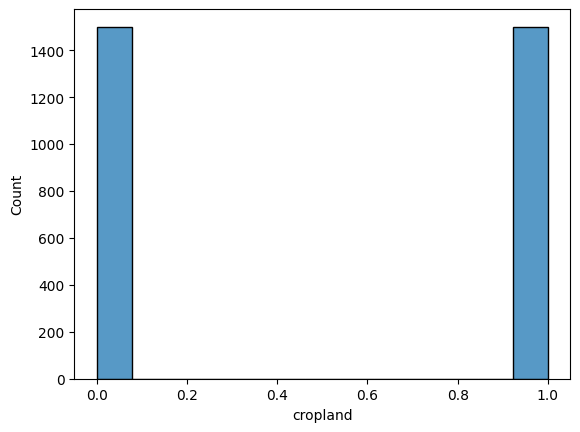

In [9]:
test=pd.read_csv("Wheat_testing.csv")
print("Test dataset has {} samples and {} attributes".format(*test.shape))

print("cropland")
sns.histplot(test,x="cropland")

test["cropland"].describe()

test_copy = test.copy()


validation dataset has 3000 samples and 37 attributes
cropland


,system:index,MNDWI_HLS,MNDWI_LS,NDBI_HLS,NDBI_LS,NDMI_HLS,NDMI_LS,NDWI_HLS,NDWI_LS,S2_EVI,...,greenness,ndratio_A,ndratio_D,random,ratio_A,ratio_D,sixth,slope,wetness,.geo
0,0,-0.474083,-0.431388,0.180589,0.120619,-0.180589,-0.120619,-0.320975,-0.327870,0.147228,...,0.002978,-0.194046,-0.228888,0.797169,0.674977,0.627487,-0.033028,3.124353,-0.195240,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,1,-0.501734,-0.440518,0.148345,0.096441,-0.148345,-0.096441,-0.381807,-0.359344,0.166386,...,0.005452,-0.247962,-0.260684,0.406833,0.602613,0.586440,-0.028940,0.236278,-0.160197,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,2,-0.502738,-0.489296,0.212134,0.188685,-0.212134,-0.188685,-0.325295,-0.331188,0.135224,...,-0.002271,-0.315483,-0.296442,0.928373,0.520354,0.542683,-0.031689,0.616255,-0.222351,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,3,-0.535002,-0.412594,-0.118922,-0.124632,0.118922,0.124632,-0.614808,-0.510915,0.216502,...,0.126135,-0.228498,-0.235494,0.862856,0.628004,0.618786,-0.013582,1.750103,-0.062381,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,4,-0.470089,-0.445818,0.148587,0.093806,-0.148587,-0.093806,-0.345645,-0.367347,0.149002,...,0.013308,-0.194996,-0.193764,0.288302,0.673646,0.675373,-0.031262,1.444699,-0.148671,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,-0.507679,-0.497766,0.138907,0.088678,-0.138907,-0.088678,-0.396752,-0.427982,0.140406,...,0.038924,-0.293866,-0.294088,0.585181,0.545755,0.545489,-0.030150,0.813987,-0.168166,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2996,2996,-0.493146,-0.508966,0.104807,0.102806,-0.104807,-0.102806,-0.409504,-0.428586,0.183548,...,0.035839,-0.240093,-0.199761,0.040135,0.612782,0.666998,-0.029621,0.180154,-0.144997,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2997,2997,-0.511582,-0.506763,0.170387,0.040370,-0.170387,-0.040370,-0.373776,-0.476134,0.294284,...,0.011508,-0.260907,-0.349500,0.860333,0.586159,0.482031,-0.027317,0.915927,-0.141277,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2998,2998,-0.514226,-0.517805,0.157688,0.148403,-0.157688,-0.148403,-0.388000,-0.400164,0.256382,...,0.016743,-0.351970,-0.370623,0.108302,0.479323,0.459191,-0.031224,0.571081,-0.142797,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


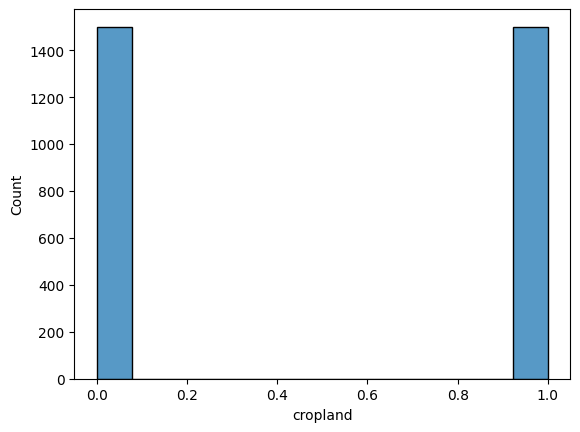

In [10]:
validation=pd.read_csv("Wheat_validation.csv")
print("validation dataset has {} samples and {} attributes".format(*validation.shape))

print("cropland")
sns.histplot(validation,x="cropland")

validation["cropland"].describe()

validation_copy = validation.copy()
validation_copy

train

In [11]:
y_train=pd.DataFrame(train_copy['cropland'])
y_train

,cropland
0,0
1,0
2,0
3,0
4,0
...,...
2995,1
2996,1
2997,1
2998,1


In [12]:
train_copy.drop(['system:index', 'cropland', 'random', '.geo'], axis=1, inplace=True)
x_train = train_copy
x_train

,MNDWI_HLS,MNDWI_LS,NDBI_HLS,NDBI_LS,NDMI_HLS,NDMI_LS,NDWI_HLS,NDWI_LS,S2_EVI,S2_MNDWI,...,fifth,fourth,greenness,ndratio_A,ndratio_D,ratio_A,ratio_D,sixth,slope,wetness
0,-0.548781,-0.452262,-0.128196,-0.276454,0.128196,0.276454,-0.632481,-0.647737,0.409796,-0.232677,...,0.068213,-0.053244,0.143628,-0.199905,-0.186033,0.666799,0.686293,-0.021866,1.517278,-0.062167
1,-0.503139,-0.473595,0.234021,0.208830,-0.234021,-0.208830,-0.305035,-0.293792,0.146633,-0.321927,...,0.085853,-0.055893,-0.012620,-0.216282,-0.182059,0.644356,0.691963,-0.034136,7.257873,-0.191377
2,-0.462866,-0.387527,0.061947,-0.003232,-0.061947,0.003232,-0.412754,-0.390271,0.172569,-0.273393,...,0.110723,-0.037847,0.071336,-0.282255,-0.285364,0.559752,0.555980,-0.020837,0.705395,-0.118801
3,-0.484955,-0.498822,-0.234642,-0.083216,0.234642,0.083216,-0.646080,-0.559367,0.211860,-0.244325,...,0.036143,-0.046307,0.096046,-0.158692,-0.214673,0.726084,0.646533,-0.023128,1.263989,-0.045594
4,-0.416667,-0.487419,0.067681,0.156486,-0.067681,-0.156486,-0.359112,-0.358214,0.202313,-0.281426,...,0.100798,-0.050824,0.013699,-0.169358,-0.181266,0.710340,0.693099,-0.027884,1.533710,-0.174224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.504221,-0.480650,0.127613,0.156394,-0.127613,-0.156394,-0.402508,-0.350599,0.111636,-0.253410,...,0.103979,-0.058381,0.021298,-0.238970,-0.194921,0.614245,0.673751,-0.031419,0.717514,-0.192628
2996,-0.504555,-0.515298,0.078694,0.049212,-0.078694,-0.049212,-0.443470,-0.478193,0.197364,-0.282324,...,0.086303,-0.052748,0.045889,-0.145954,-0.137202,0.745270,0.758703,-0.029875,0.942266,-0.150554
2997,-0.477100,-0.463863,0.078837,0.025603,-0.078837,-0.025603,-0.413829,-0.443526,0.226138,-0.290802,...,0.081933,-0.047192,0.037233,-0.208332,-0.177493,0.655174,0.698524,-0.028049,1.215313,-0.135881
2998,-0.520775,-0.498801,0.061755,0.011967,-0.061755,-0.011967,-0.474273,-0.489745,0.265219,-0.247799,...,0.075657,-0.052030,0.050898,-0.229408,-0.261282,0.626800,0.585688,-0.024553,0.759658,-0.119146


test

In [13]:
y_test=pd.DataFrame(test_copy['cropland'])
y_test

,cropland
0,0
1,0
2,0
3,0
4,0
...,...
2995,1
2996,1
2997,1
2998,1


In [14]:
test_copy.drop(['system:index', 'cropland', 'random', '.geo'], axis=1, inplace=True)
x_test = test_copy
x_test

,MNDWI_HLS,MNDWI_LS,NDBI_HLS,NDBI_LS,NDMI_HLS,NDMI_LS,NDWI_HLS,NDWI_LS,S2_EVI,S2_MNDWI,...,fifth,fourth,greenness,ndratio_A,ndratio_D,ratio_A,ratio_D,sixth,slope,wetness
0,-0.542359,-0.530312,0.222850,0.194206,-0.222850,-0.194206,-0.363436,-0.374684,0.155687,-0.340521,...,0.061955,-0.045112,0.008674,-0.204363,-0.165000,0.660629,0.716738,-0.031580,2.016724,-0.187081
1,-0.470342,-0.444007,0.162397,0.136558,-0.162397,-0.136558,-0.333411,-0.327293,0.148807,-0.244876,...,0.114054,-0.054281,0.006585,-0.243747,-0.245895,0.608044,0.605271,-0.033288,0.569219,-0.192053
2,-0.433494,-0.354463,-0.095567,-0.048894,0.095567,0.048894,-0.508015,-0.396486,0.164972,-0.198032,...,0.088687,-0.045139,0.104623,-0.243126,-0.254618,0.608848,0.594111,-0.028868,1.074596,-0.096737
3,-0.452239,-0.411715,-0.024887,0.005404,0.024887,-0.005404,-0.471816,-0.407217,0.245060,-0.192085,...,0.082210,-0.051142,0.061674,-0.280835,-0.302363,0.561481,0.535670,-0.021832,1.287155,-0.107916
4,-0.453676,-0.431740,0.187900,0.173294,-0.187900,-0.173294,-0.290544,-0.279971,0.130897,-0.261543,...,0.081541,-0.055197,-0.013551,-0.254457,-0.229490,0.594316,0.626690,-0.036808,4.249340,-0.172420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.447197,-0.461341,0.102439,0.078814,-0.102439,-0.078814,-0.361310,-0.396940,0.194497,-0.287929,...,0.093813,-0.055520,0.021340,-0.175812,-0.197851,0.700952,0.669657,-0.038304,1.409270,-0.148781
2996,-0.501368,-0.461251,0.108376,0.036634,-0.108376,-0.036634,-0.415573,-0.431915,0.230115,-0.269097,...,0.075146,-0.043476,0.030401,-0.182737,-0.176984,0.690993,0.699258,-0.024739,0.230132,-0.143740
2997,-0.498204,-0.494806,0.112731,0.065607,-0.112731,-0.065607,-0.408411,-0.443611,0.256431,-0.224464,...,0.089159,-0.055645,0.022275,-0.324413,-0.225344,0.510102,0.632195,-0.029031,0.329136,-0.144309
2998,-0.541937,-0.447535,0.154580,-0.010454,-0.154580,0.010454,-0.422774,-0.455892,0.347730,-0.273250,...,0.079762,-0.054519,0.020969,-0.208111,-0.217813,0.655477,0.642288,-0.027585,1.636277,-0.151386


In [15]:
y_validation = pd.DataFrame(validation_copy['cropland'])
y_validation

,cropland
0,0
1,0
2,0
3,0
4,0
...,...
2995,1
2996,1
2997,1
2998,1


In [16]:
validation_copy.drop(['system:index', 'cropland', 'random', '.geo'], axis=1, inplace=True)
x_validation = validation_copy
x_validation

,MNDWI_HLS,MNDWI_LS,NDBI_HLS,NDBI_LS,NDMI_HLS,NDMI_LS,NDWI_HLS,NDWI_LS,S2_EVI,S2_MNDWI,...,fifth,fourth,greenness,ndratio_A,ndratio_D,ratio_A,ratio_D,sixth,slope,wetness
0,-0.474083,-0.431388,0.180589,0.120619,-0.180589,-0.120619,-0.320975,-0.327870,0.147228,-0.309908,...,0.103328,-0.051410,0.002978,-0.194046,-0.228888,0.674977,0.627487,-0.033028,3.124353,-0.195240
1,-0.501734,-0.440518,0.148345,0.096441,-0.148345,-0.096441,-0.381807,-0.359344,0.166386,-0.307576,...,0.096526,-0.053621,0.005452,-0.247962,-0.260684,0.602613,0.586440,-0.028940,0.236278,-0.160197
2,-0.502738,-0.489296,0.212134,0.188685,-0.212134,-0.188685,-0.325295,-0.331188,0.135224,-0.322681,...,0.112189,-0.058573,-0.002271,-0.315483,-0.296442,0.520354,0.542683,-0.031689,0.616255,-0.222351
3,-0.535002,-0.412594,-0.118922,-0.124632,0.118922,0.124632,-0.614808,-0.510915,0.216502,-0.216340,...,0.067953,-0.040987,0.126135,-0.228498,-0.235494,0.628004,0.618786,-0.013582,1.750103,-0.062381
4,-0.470089,-0.445818,0.148587,0.093806,-0.148587,-0.093806,-0.345645,-0.367347,0.149002,-0.289384,...,0.081696,-0.054155,0.013308,-0.194996,-0.193764,0.673646,0.675373,-0.031262,1.444699,-0.148671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.507679,-0.497766,0.138907,0.088678,-0.138907,-0.088678,-0.396752,-0.427982,0.140406,-0.249289,...,0.093513,-0.056062,0.038924,-0.293866,-0.294088,0.545755,0.545489,-0.030150,0.813987,-0.168166
2996,-0.493146,-0.508966,0.104807,0.102806,-0.104807,-0.102806,-0.409504,-0.428586,0.183548,-0.272669,...,0.090033,-0.054205,0.035839,-0.240093,-0.199761,0.612782,0.666998,-0.029621,0.180154,-0.144997
2997,-0.511582,-0.506763,0.170387,0.040370,-0.170387,-0.040370,-0.373776,-0.476134,0.294284,-0.304751,...,0.070995,-0.048854,0.011508,-0.260907,-0.349500,0.586159,0.482031,-0.027317,0.915927,-0.141277
2998,-0.514226,-0.517805,0.157688,0.148403,-0.157688,-0.148403,-0.388000,-0.400164,0.256382,-0.305571,...,0.068753,-0.050985,0.016743,-0.351970,-0.370623,0.479323,0.459191,-0.031224,0.571081,-0.142797


In [17]:
# # Example: If you have a DataFrame 'df' with 'rh100' as the target column.
# def plot_scatter_with_cropland(x_train, target_column='cropland'):
#     # Check if 'rh100' exists in the DataFrame
#     if target_column not in train.columns:
#         raise ValueError(f"'{target_column}' is not a column in the DataFrame.")

#     # Set up the number of subplots based on the number of columns (excluding 'rh100')
#     features = train.drop(columns=[target_column]).columns
#     num_cols = len(features)
#     num_rows = (num_cols // 3) + 1  # Customize for more/less features per row

#     fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  # Adjust figure size
#     axes = axes.flatten()  # Flatten the axes array for easy indexing

#     for i, column in enumerate(features):
#         sns.scatterplot(x=train[column], y=train[target_column], ax=axes[i])
#         axes[i].set_title(f"{column} vs {target_column}")
#         axes[i].set_xlabel(column)
#         axes[i].set_ylabel(target_column)

#     # Remove any unused subplots
#     for j in range(i + 1, len(axes)):
#         fig.delaxes(axes[j])

#     plt.tight_layout()
#     plt.show()

# # Example: df = pd.read_csv('your_dataset.csv')
# plot_scatter_with_cropland(train)

In [18]:
head_list = list(x_train.columns.values)
head_list

['MNDWI_HLS',
 'MNDWI_LS',
 'NDBI_HLS',
 'NDBI_LS',
 'NDMI_HLS',
 'NDMI_LS',
 'NDWI_HLS',
 'NDWI_LS',
 'S2_EVI',
 'S2_MNDWI',
 'S2_NDBI',
 'S2_NDMI',
 'S2_NDVI',
 'S2_NDWI',
 'S2_SAVI',
 'SAVI_HLS',
 'SAVI_LS',
 'VH_A',
 'VH_D',
 'VV_A',
 'VV_D',
 'brightness',
 'dem',
 'fifth',
 'fourth',
 'greenness',
 'ndratio_A',
 'ndratio_D',
 'ratio_A',
 'ratio_D',
 'sixth',
 'slope',
 'wetness']

In [19]:
corr_df=train[head_list]  #New dataframe to calculate correlation between numeric features
cor= corr_df.corr(method='pearson')
print(cor)

            MNDWI_HLS  MNDWI_LS  NDBI_HLS   NDBI_LS  NDMI_HLS   NDMI_LS  \
MNDWI_HLS    1.000000  0.733047 -0.333574 -0.161364  0.333574  0.161364   
MNDWI_LS     0.733047  1.000000 -0.354466 -0.294459  0.354466  0.294459   
NDBI_HLS    -0.333574 -0.354466  1.000000  0.826873 -1.000000 -0.826873   
NDBI_LS     -0.161364 -0.294459  0.826873  1.000000 -0.826873 -1.000000   
NDMI_HLS     0.333574  0.354466 -1.000000 -0.826873  1.000000  0.826873   
NDMI_LS      0.161364  0.294459 -0.826873 -1.000000  0.826873  1.000000   
NDWI_HLS     0.322092  0.137893  0.782564  0.730236 -0.782564 -0.730236   
NDWI_LS      0.339956  0.392279  0.559489  0.762334 -0.559489 -0.762334   
S2_EVI      -0.212495 -0.191188 -0.465160 -0.635852  0.465160  0.635852   
S2_MNDWI     0.410262  0.413467 -0.667982 -0.580209  0.667982  0.580209   
S2_NDBI     -0.094540 -0.133714  0.793771  0.854428 -0.793771 -0.854428   
S2_NDMI      0.094540  0.133714 -0.793771 -0.854428  0.793771  0.854428   
S2_NDVI     -0.274688 -0.

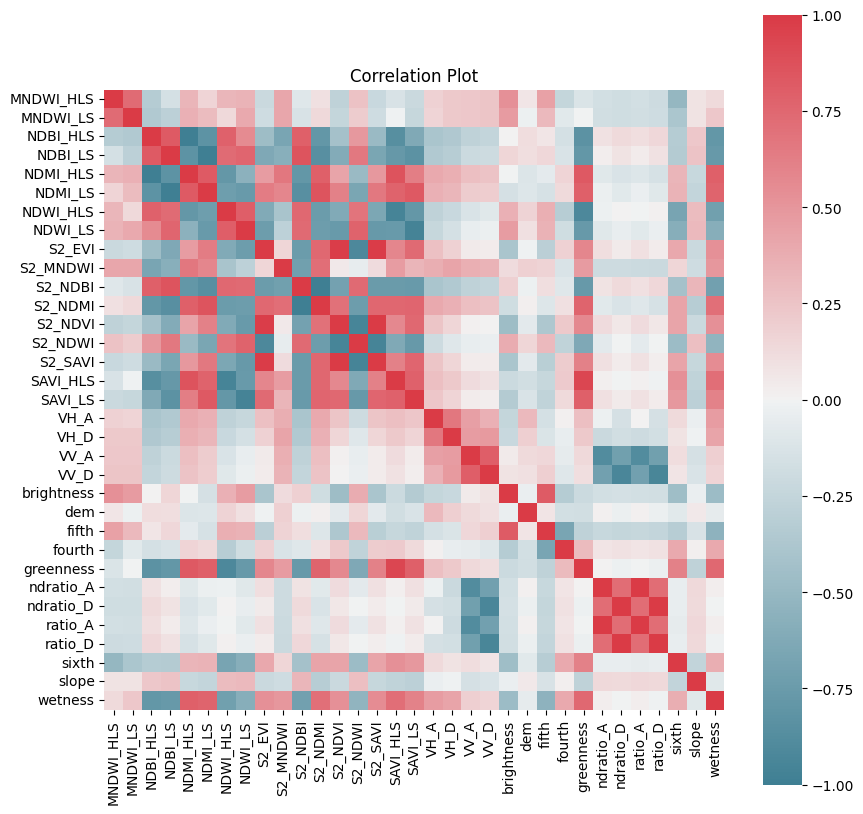

In [20]:
fig, ax =plt.subplots(figsize=(10, 10))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

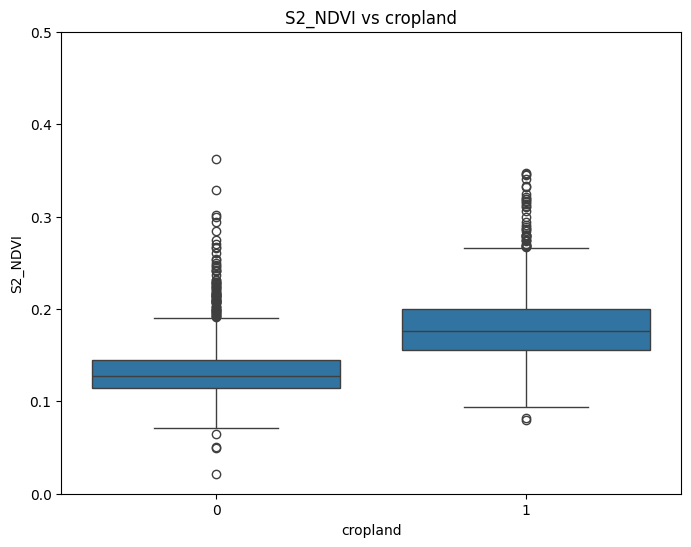

In [21]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='cropland',y='S2_NDVI', data=train)
ax.set_ylim(0,.5)
plt.title("S2_NDVI vs cropland")
plt.show()

In [23]:
# # Path to the 5-band TIFF file
# from rasterio.enums import Resampling


# input_tiff_path = '/content/drive/MyDrive/Colab_workspace/LandsatComposite_2022.tif'
# output_tiff_path = '/content/drive/MyDrive/Colab_workspace/output_33_band_tiff.tif'

# # Open the 5-band TIFF file
# with rasterio.open(input_tiff_path) as src:
#     # Read all 5 bands into an array
#     bands_data = src.read()

#     # Check the shape of the original 5-band data
#     # Shape will be (bands, height, width)
#     print(f"Original shape: {bands_data.shape}")

#     # Create a new array for 33 bands (by repeating the 5-band data)
#     # We use np.tile to duplicate the 5-band data 7 times and select the first 33 bands
#     bands_33 = np.tile(bands_data, (7, 1, 1))[:33]

#     # Check the new shape
#     print(f"New shape with 33 bands: {bands_33.shape}")

#     # Update the metadata to reflect the new number of bands
#     new_meta = src.meta.copy()
#     new_meta.update(count=33)

#     # Write the new 33-band TIFF file
#     with rasterio.open(output_tiff_path, 'w', **new_meta) as dst:
#         dst.write(bands_33)

# print("33-band TIFF file created successfully.")

Original shape: (5, 1338, 2082)
New shape with 33 bands: (33, 1338, 2082)
33-band TIFF file created successfully.


In [24]:
# # Path to the 33-band TIFF file
# input_tiff_path = '/content/drive/MyDrive/Colab_workspace/output_33_band_tiff.tif'
# output_tiff_path = '/content/drive/MyDrive/Colab_workspace/output_2d_tiff.tif'

# # Open the 33-band TIFF file
# with rasterio.open(input_tiff_path) as src:
#     # Read all 33 bands
#     bands_data = src.read()

#     # Check the shape of the original 33-band data
#     print(f"Original shape: {bands_data.shape}")

#     # Collapse the 33-band image to 2D by taking the mean of the bands
#     collapsed_image = np.mean(bands_data, axis=0)

#     # Check the new shape (should be 2D: 1338, 2082)
#     print(f"Collapsed image shape: {collapsed_image.shape}")

#     # Update the metadata to reflect the change to 1 band
#     new_meta = src.meta.copy()
#     new_meta.update(count=1)

#     # Write the new 2D TIFF file
#     with rasterio.open(output_tiff_path, 'w', **new_meta) as dst:
#         dst.write(collapsed_image, 1)

# print("2D TIFF image created successfully.")


In [25]:

# image_path = 'output_2d_tiff.tif'

# # Load the .tif image using rasterio
# with rasterio.open(image_path) as src:
#     image2D = src.read()  # Read all the bands of the image

# # Check the dimensions of the image (bands, height, width)
# print(image2D)

In [26]:
# # Path to the input and output TIFF files
# input_tiff_path = '/content/drive/MyDrive/Colab_workspace/output_33_band_tiff.tif'
# output_tiff_path = '/content/drive/MyDrive/Colab_workspace/output_tiff_no_nans.tif'

# # Open the TIFF file
# with rasterio.open(input_tiff_path) as src:
#     # Read the data into a NumPy array
#     image_data = src.read()

#     # Check for NaN values
#     nan_mask = np.isnan(image_data)

#     # Create a mask of where there are valid (non-NaN) values
#     valid_mask = ~np.all(nan_mask, axis=0)

#     # Find the rows and columns where there are valid values
#     valid_rows = np.where(np.any(valid_mask, axis=1))[0]
#     valid_cols = np.where(np.any(valid_mask, axis=0))[0]

#     # Get the bounding box of the valid data
#     min_row, max_row = valid_rows[0], valid_rows[-1]
#     min_col, max_col = valid_cols[0], valid_cols[-1]

#     # Crop the image data based on the valid bounding box
#     cropped_data = image_data[:, min_row:max_row+1, min_col:max_col+1]

#     # Update the metadata for the cropped image
#     new_meta = src.meta.copy()
#     new_meta.update({
#         'height': cropped_data.shape[1],  # new height
#         'width': cropped_data.shape[2],   # new width
#         'transform': src.window_transform(((min_row, max_row+1), (min_col, max_col+1)))  # update transform
#     })

#     # Write the cropped image to a new TIFF file
#     with rasterio.open(output_tiff_path, 'w', **new_meta) as dst:
#         dst.write(cropped_data)

# print(f"Cropped TIFF saved successfully to {output_tiff_path}")


Cropped TIFF saved successfully to /content/drive/MyDrive/Colab_workspace/output_tiff_no_nans.tif


In [27]:
# image_path = 'output_tiff_no_nans.tif'

# # Load the .tif image using rasterio
# with rasterio.open(image_path) as src:
#     image2D_nan = src.read()  # Read all the bands of the image

# # Check the dimensions of the image (bands, height, width)
# print(image2D_nan)
# print(image2D_nan.shape)

[[[1.9737500e-01 1.9093999e-01 1.9679751e-01 ... 1.6506250e-01
   1.6330250e-01 1.6668500e-01]
  [1.9382749e-01 1.9382749e-01 1.9946501e-01 ... 1.7763001e-01
   1.7144249e-01 1.7221250e-01]
  [2.0755000e-01 2.0755000e-01 2.0601000e-01 ... 1.7611749e-01
   1.7320250e-01 1.7339499e-01]
  ...
  [1.4579874e-01 1.3958375e-01 1.3958375e-01 ... 1.9327749e-01
   1.6415501e-01 1.6415501e-01]
  [1.4401124e-01 1.3926750e-01 1.3926750e-01 ... 1.9897000e-01
   1.6566750e-01 1.6566750e-01]
  [1.4215501e-01 1.3999625e-01 1.3999625e-01 ... 2.0028999e-01
   1.8904249e-01 1.8904249e-01]]

 [[1.5274251e-01 1.4787500e-01 1.5098250e-01 ... 1.2488500e-01
   1.2502250e-01 1.2373000e-01]
  [1.5144999e-01 1.5144999e-01 1.5323751e-01 ... 1.3412499e-01
   1.3093500e-01 1.2752500e-01]
  [1.5810500e-01 1.5810500e-01 1.5634499e-01 ... 1.3214500e-01
   1.3112751e-01 1.2912001e-01]
  ...
  [1.2049875e-01 1.1787250e-01 1.1787250e-01 ... 1.4160500e-01
   1.3121000e-01 1.3121000e-01]
  [1.1792750e-01 1.1590625e-01 1.159

In [28]:

# # Replace 'your_image.tif' with the actual file name of the uploaded .tif image
# image_path = 'output_tiff_no_nans.tif' #LandsatComposite_2022 # Stack_Reasmpled_10_16

# # Load the .tif image using rasterio
# with rasterio.open(image_path) as src:
#     image_nan = src.read()  # Read all the bands of the image

# # Check the dimensions of the image (bands, height, width)
# print(image_nan.shape)
# image_nan



(33, 1336, 2080)


array([[[1.9737500e-01, 1.9093999e-01, 1.9679751e-01, ...,
         1.6506250e-01, 1.6330250e-01, 1.6668500e-01],
        [1.9382749e-01, 1.9382749e-01, 1.9946501e-01, ...,
         1.7763001e-01, 1.7144249e-01, 1.7221250e-01],
        [2.0755000e-01, 2.0755000e-01, 2.0601000e-01, ...,
         1.7611749e-01, 1.7320250e-01, 1.7339499e-01],
        ...,
        [1.4579874e-01, 1.3958375e-01, 1.3958375e-01, ...,
         1.9327749e-01, 1.6415501e-01, 1.6415501e-01],
        [1.4401124e-01, 1.3926750e-01, 1.3926750e-01, ...,
         1.9897000e-01, 1.6566750e-01, 1.6566750e-01],
        [1.4215501e-01, 1.3999625e-01, 1.3999625e-01, ...,
         2.0028999e-01, 1.8904249e-01, 1.8904249e-01]],

       [[1.5274251e-01, 1.4787500e-01, 1.5098250e-01, ...,
         1.2488500e-01, 1.2502250e-01, 1.2373000e-01],
        [1.5144999e-01, 1.5144999e-01, 1.5323751e-01, ...,
         1.3412499e-01, 1.3093500e-01, 1.2752500e-01],
        [1.5810500e-01, 1.5810500e-01, 1.5634499e-01, ...,
         1.321

In [29]:
# image_reshaped = image_nan.reshape(image_nan.shape[0], -1).T  # Shape will be (num_pixels, num_bands)
# print("Reshaped image shape:", image_reshaped.shape)

Reshaped image shape: (2778880, 33)


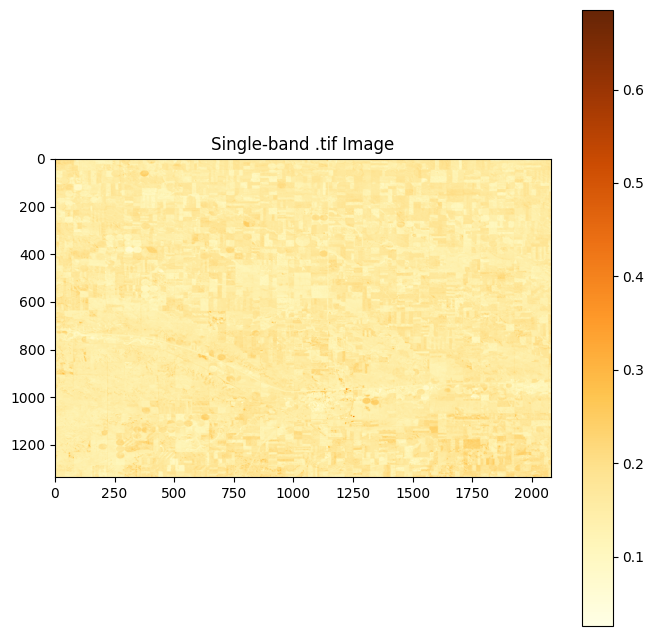

In [30]:
# # Single-band image (e.g., grayscale or elevation data)
# plt.figure(figsize=(8, 8))
# plt.imshow(image_nan[0], cmap='YlOrBr')  # Assuming it's a single-band image, use 'image[0]' to access the first band
# plt.title('Single-band .tif Image')
# plt.colorbar()
# plt.show()


In [31]:
# Create some sample training labels (for simplicity, we manually define some points)
# For real-world applications, this part should involve actual labeled data

# Example: First 100 pixels are class 0 (e.g., water), next 100 pixels are class 1 (e.g., vegetation)
# # The size of labeled_data and labels should match the real data you use.
# labeled_data = image_reshaped[:200, :]  # Example labeled data (you need real labeled regions)
# labels = np.array([0] * 100 + [1] * 100)  # Example labels: 0 for first 100 pixels, 1 for next 100



# Grid Search params and data scaling

In [32]:
###scale data for algorithms that need it
sc = StandardScaler()
x_train_sc = pd.DataFrame(sc.fit_transform(x_train))
x_test_sc = pd.DataFrame(sc.transform(x_test))

In [33]:
##used for the MLP
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.fit_transform(x_test)

In [34]:
folds  = 5
score_calc = 'accuracy' #'neg_mean_squared_error'

In [35]:
# def get_best_score(grid):

#     best_score = np.sqrt(-grid.best_score_)
#     print(best_score)
#     print(grid.best_params_)
#     print(grid.best_estimator_)

#     return best_score

In [36]:
def get_best_score(grid):

    best_score = grid.best_score_
    print(best_score)
    print(grid.best_params_)
    print(grid.best_estimator_)

    return best_score

## SVM Classificaiton

In [37]:

param_grid = {'C': [10],'coef0': [0.01], 'degree': [3], 'gamma': [0.1], 'kernel': ['linear']}

# param_grid = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
#               'C' : [0.1, 1, 10],
#               'degree' : [3],
#               'coef0' : [0.01,10],
#               'gamma' : [0.1, 0.01, 0.001]}

grid_svc = GridSearchCV(SVC(), param_grid, cv = folds, refit = True, verbose = 3, scoring = score_calc)
grid_svc.fit(x_train_sc.values, y_train["cropland"].values)

sc_svc = get_best_score(grid_svc)

pred_svc = grid_svc.predict(x_test_sc.values)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.913 total time=   0.7s
[CV 2/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.920 total time=   0.6s
[CV 3/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.890 total time=   0.8s
[CV 4/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.897 total time=   0.6s
[CV 5/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.888 total time=   0.8s
0.9016666666666667
{'C': 10, 'coef0': 0.01, 'degree': 3, 'gamma': 0.1, 'kernel': 'linear'}
SVC(C=10, coef0=0.01, gamma=0.1, kernel='linear')


In [38]:
print('F1-Score:', f1_score(y_test, pred_svc))
print('Recall:', recall_score(y_test, pred_svc))
print('Accuracy:',accuracy_score(y_test, pred_svc))
print('Precision:',precision_score(y_test, pred_svc))
print('classification_report',classification_report(y_test, pred_svc))
cm = confusion_matrix(y_test, pred_svc)
cm

F1-Score: 0.8992758393680053
Recall: 0.9106666666666666
Accuracy: 0.898
Precision: 0.8881664499349805
classification_report               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1500
           1       0.89      0.91      0.90      1500

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



array([[1328,  172],
       [ 134, 1366]])

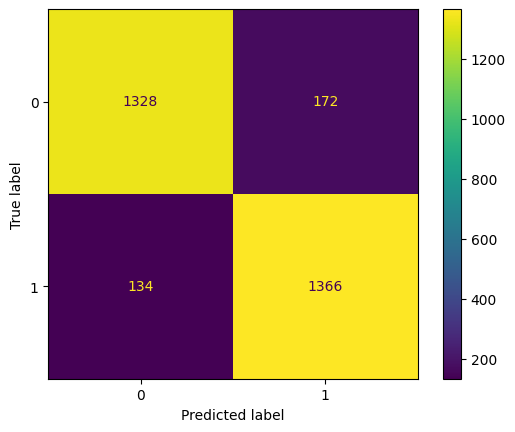

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot()

plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.823 total time=   0.6s
[CV 2/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.820 total time=   0.6s
[CV 3/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.797 total time=   0.6s
[CV 4/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.765 total time=   0.5s
[CV 5/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.768 total time=   0.6s


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

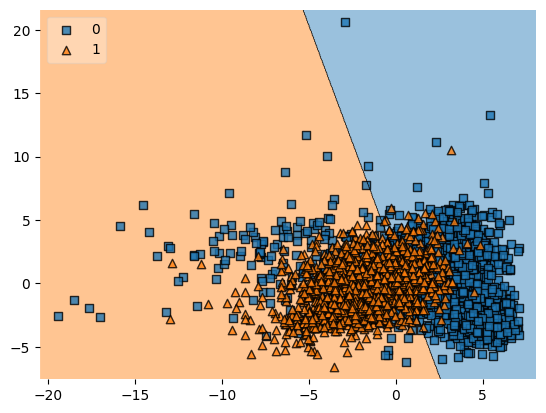

In [78]:
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train_sc.values)
grid_svc.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train["cropland"].values, clf=grid_svc, legend=2)

plt.xlabel(X_train2.columns[0], size=14)
plt.ylabel(X_train2.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)


       Feature  Importance
6     NDWI_HLS    6.399159
13     S2_NDWI    5.463355
0    MNDWI_HLS    5.075919
7      NDWI_LS    4.829957
2     NDBI_HLS    4.029512
4     NDMI_HLS    4.029512
12     S2_NDVI    4.029415
9     S2_MNDWI    3.935410
10     S2_NDBI    3.909432
11     S2_NDMI    3.909432
1     MNDWI_LS    3.865468
3      NDBI_LS    3.096519
5      NDMI_LS    3.096519
16     SAVI_LS    2.959477
8       S2_EVI    2.205963
19        VV_A    1.319023
15    SAVI_HLS    1.266188
28     ratio_A    1.043594
27   ndratio_D    1.029809
17        VH_A    1.000749
20        VV_D    0.871431
25   greenness    0.832957
23       fifth    0.648516
26   ndratio_A    0.542463
21  brightness    0.508184
24      fourth    0.398651
30       sixth    0.374332
14     S2_SAVI    0.344761
32     wetness    0.305732
31       slope    0.254974
22         dem    0.165116
29     ratio_D    0.061789
18        VH_D    0.060515


Text(0.5, 1.0, 'Feature Importance from GridSearchCV Optimized Linear SVM')

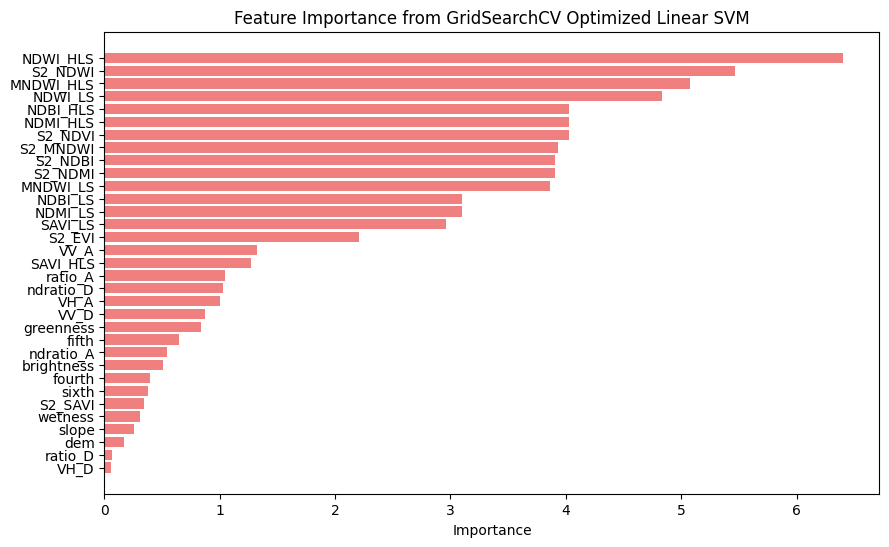

In [40]:

best_model = grid_svc.best_estimator_

coefficients = np.abs(best_model.coef_).flatten()

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': x_train.columns.values, 'Importance': coefficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='lightcoral')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance from GridSearchCV Optimized Linear SVM')

In [41]:
# Load a sample GeoTIFF image (update the file path as needed)
# image_path = '/content/drive/MyDrive/Colab_workspace/Stack_Reasmpled_10_16.tif'
# image = geemap.load_GeoTIFF(image_path)

image = ee.Image("projects/servir-sco-assets/assets/AIA_Project/stackedResampled")

# Define training data points (with example coordinates)
# land_class_1 = ee.Geometry.Point([longitude1, latitude1])
# land_class_2 = ee.Geometry.Point([longitude2, latitude2])

# Create labeled feature collection
training_data = ee.FeatureCollection("projects/servir-sco-assets/assets/AIA_Project/Wheat_training")

# Sample the image to create training data
training = image.sampleRegions(
    collection=training_data,
    properties=['cropland'],
    scale=10
)

# Train a Random Forest classifier
classifier = ee.Classifier.libsvm().train(
    features=training,
    classProperty='cropland',
    inputProperties=image.bandNames()
)

# Apply the classifier to the image
classified = image.classify(classifier)

wheat_only = classified.select('classification').eq(1)
wheat_only_final = classified.updateMask(wheat_only);
Map.addLayer(wheat_only_final, {'min': 1, 'max': 1, 'palette': ["ffa630"]}, 'wheat_only_final');
Map.centerObject(wheat_only_final, 10)
# # Optional: Export classified image to Google Drive
# export_task = ee.batch.Export.image.toDrive(
#     image=classified,
#     description='Classified_Image',
#     folder='EarthEngineImages',
#     fileNamePrefix='classified_image',
#     scale=30,
#     region=image.geometry().bounds().getInfo()
# )
# export_task.start()

table = ee.FeatureCollection("projects/servir-sco-assets/assets/AIA_Project/Wheat_training_2023_Groundtruth")

fcPolygonSamp = classified.sampleRegions(**{
  'collection': table,
  'scale': 10,
  'geometries': True
});

Map.addLayer(fcPolygonSamp, {}, 'groundTruth_2023')


Map

Map(center=[41.22850160682466, -103.00127965843882], controls=(WidgetControl(options=['position', 'transparent…

In [42]:
# print("stat_sample", stat_sample)
stat_sample_df = geemap.ee_to_df(fcPolygonSamp)
# print("stat_sample_df", stat_sample_df)
y_true = stat_sample_df['cropland']
y_pred = stat_sample_df['classification']


print('F1-Score:', f1_score(y_true, y_pred))
print('Recall:', recall_score(y_true, y_pred))
print('Accuracy:',accuracy_score(y_true, y_pred))
print('Precision:',precision_score(y_true, y_pred))
print('classification_report',classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
cm


F1-Score: 0.10119047619047619
Recall: 0.068
Accuracy: 0.396
Precision: 0.19767441860465115
classification_report               precision    recall  f1-score   support

           0       0.44      0.72      0.55      1000
           1       0.20      0.07      0.10      1000

    accuracy                           0.40      2000
   macro avg       0.32      0.40      0.32      2000
weighted avg       0.32      0.40      0.32      2000



array([[724, 276],
       [932,  68]])

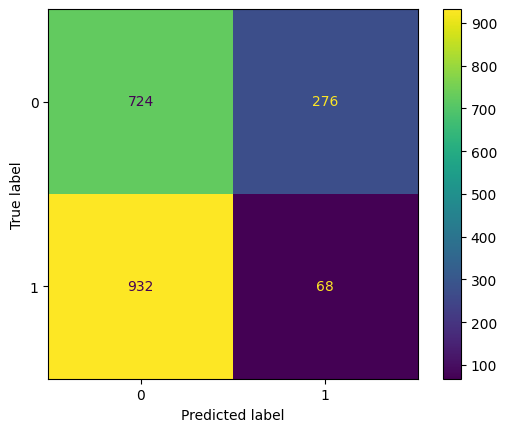

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot()

plt.show()

In [44]:
# svm_model = SVC(C=10, coef0=0.01, gamma=0.1, kernel='linear')
# svm_model.fit(x_train_sc.values, y_train["cropland"].values)

# svm_model

In [45]:
# from google.colab.patches import cv2_imshow

# def hist_stretch(x):
#     _, n = x.shape
#     for k in range(n):
#         data = x[:, k]
#         cur_lim = np.quantile(data, (0.025, 0.975))
#         data = np.maximum(cur_lim[0], np.minimum(cur_lim[1], data))
#         data = np.floor(255*(data-cur_lim[0])/(cur_lim[1]-cur_lim[0]))
#         x[:, k] = data
#     return x

# f = gdal.Open("output_tiff_no_nans.tif")
# d = f.RasterCount
# w = f.RasterXSize  # 1021
# h = f.RasterYSize  # 731

# A_image = f.ReadAsArray(0, 0, w, h)
# A_image_data = A_image.copy().transpose(1, 2, 0).reshape(-1, d)  # (746351, 72)

# # Histogram stretch for display. Only first 8 bands.
# A_image_data[:, 0:8] = hist_stretch(A_image_data[:, 0:8])

# # Set RGB composition
# red = A_image_data.reshape(h, w, d)[:, :, 3]
# green = A_image_data.reshape(h, w, d)[:, :, 2]
# blue = A_image_data.reshape(h, w, d)[:, :, 1]
# image = np.concatenate((blue[:, :, None], green[:, :, None], red[:, :, None]), axis=-1)

# cv2_imshow(image)

In [46]:


# ymap = svm_model.predict(A_image.transpose(1, 2, 0).reshape(-1, d)[:,])
# w = f.RasterXSize  # 1021
# h = f.RasterYSize  # 731
# ymap = ymap.reshape(h, w)

# df = pd.DataFrame(ymap)
# #sns.heatmap(data=df, cmap=[[0, 1, 0], [1, 0, 0], [0, 0, 1], [1, 1, 0],
#  #[1, 0, 1], [46/255, 139/255, 87/255]])
# fig = sns.heatmap(data=df, cmap= 'YlOrBr' )
# heatmap = fig.get_figure()
# heatmap.savefig("./classification_map.tif", dpi = 400)

In [47]:
# import rasterio

# image_path = 'output_tiff_no_nans.tif'

# # Open the image
# with rasterio.open(image_path) as src:
#     image_nan_im = src.read()  # shape will be (bands, height, width)
#     print(f"Original image shape (bands, height, width): {image.shape}")

In [48]:
# image_reshaped = image.reshape(image_nan_im.shape[0], -1).T  # Now shape will be (num_pixels, num_bands)
# print(f"Reshaped image shape: {image_reshaped.shape}")
# image_reshaped

In [49]:
# predicted_labels = svm_model.predict(image_reshaped)
# # predicted_labels.describe()

# ww=pd.DataFrame(predicted_labels)
# ww.describe()

In [50]:
# # Classify the entire image
# # image_scaled = sc.transform(image_reshaped)
# predicted_labels = svm_model.predict(image_reshaped)

# height = 1336
# width = 2080

# # n_bands, height, width = image_scaled.shape
# # image = image.reshape((n_bands, height * width)).T

# # Reshape the predicted labels back to the original image shape
# predicted_labels_image = predicted_labels.reshape((height, width))

# # # Optionally save the classified image using rasterio
# # with rasterio.open('classified_image.tif', 'w', driver='GTiff',
# #                    height=height, width=width, count=1, dtype=predicted_labels_image.dtype) as dst:
# #     dst.write(predicted_labels_image, 1)

In [51]:

# plt.figure(figsize=(8, 8))
# plt.imshow(predicted_labels_image, cmap='YlOrBr')  # Assuming it's a single-band image, use 'image[0]' to access the first band
# plt.title('Single-band .tif Image')
# plt.colorbar()
# plt.show()

## RF Classifer

In [52]:

param_grid = {'min_samples_split' : [3], 'n_estimators' : [150], 'random_state': [5]}

# param_grid = {
#               'n_estimators': [10,50,100,150,200],
#               'criterion': ['gini', 'entropy', 'log_loss'],
#               'n_estimators': [50, 60, 70, 100, 150],
#               'max_depth':  [None, 2,4,6,8],
#               'max_features': ['sqrt', 'log2', None],
#               'min_samples_split': [2,4,6,8],
#               'random_state': [42]}


grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv = folds, refit=True, verbose = 3, scoring = score_calc)
grid_rf.fit(x_train.values, y_train['cropland'].values)

sc_rf = get_best_score(grid_rf)
pred_rf = grid_rf.predict(x_test.values)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.918 total time=   1.5s
[CV 2/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.910 total time=   1.5s
[CV 3/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.903 total time=   1.4s
[CV 4/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.922 total time=   1.4s
[CV 5/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.897 total time=   1.4s
0.9099999999999999
{'min_samples_split': 3, 'n_estimators': 150, 'random_state': 5}
RandomForestClassifier(min_samples_split=3, n_estimators=150, random_state=5)


In [53]:
print('F1-Score:', f1_score(y_test, pred_rf))
print('Recall:', recall_score(y_test, pred_rf))
print('Accuracy:',accuracy_score(y_test, pred_rf))
print('Precision:',precision_score(y_test, pred_rf))
print('classification_report',classification_report(y_test, pred_rf))
cm = confusion_matrix(y_test, pred_rf)
cm

F1-Score: 0.9077637690776377
Recall: 0.912
Accuracy: 0.9073333333333333
Precision: 0.9035667107001321
classification_report               precision    recall  f1-score   support

           0       0.91      0.90      0.91      1500
           1       0.90      0.91      0.91      1500

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



array([[1354,  146],
       [ 132, 1368]])

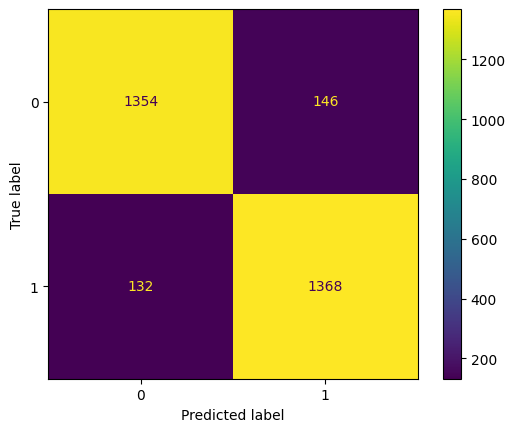

In [54]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot()

plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.582 total time=   0.6s
[CV 2/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.577 total time=   0.6s
[CV 3/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.597 total time=   0.6s
[CV 4/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.600 total time=   0.5s
[CV 5/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.588 total time=   0.6s


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

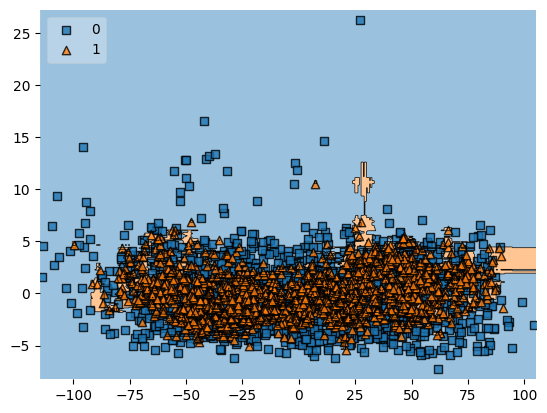

In [79]:
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train.values)
grid_rf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train["cropland"].values, clf=grid_rf, legend=2)

plt.xlabel(X_train2.columns[0], size=14)
plt.ylabel(X_train2.columns[1], size=14)
plt.title('RF Decision Region Boundary', size=16)

       Feature  Importance
16     SAVI_LS    0.117578
11     S2_NDMI    0.092300
10     S2_NDBI    0.078264
14     S2_SAVI    0.067677
8       S2_EVI    0.058915
7      NDWI_LS    0.058295
12     S2_NDVI    0.049682
3      NDBI_LS    0.032435
13     S2_NDWI    0.031232
5      NDMI_LS    0.030022
25   greenness    0.029458
4     NDMI_HLS    0.028689
32     wetness    0.027039
2     NDBI_HLS    0.026953
15    SAVI_HLS    0.025807
30       sixth    0.024096
6     NDWI_HLS    0.022707
24      fourth    0.021789
9     S2_MNDWI    0.021454
23       fifth    0.014940
1     MNDWI_LS    0.014580
17        VH_A    0.014162
19        VV_A    0.013541
18        VH_D    0.013089
21  brightness    0.011954
22         dem    0.010951
26   ndratio_A    0.010521
28     ratio_A    0.010464
0    MNDWI_HLS    0.008919
27   ndratio_D    0.008309
20        VV_D    0.008297
31       slope    0.007967
29     ratio_D    0.007913


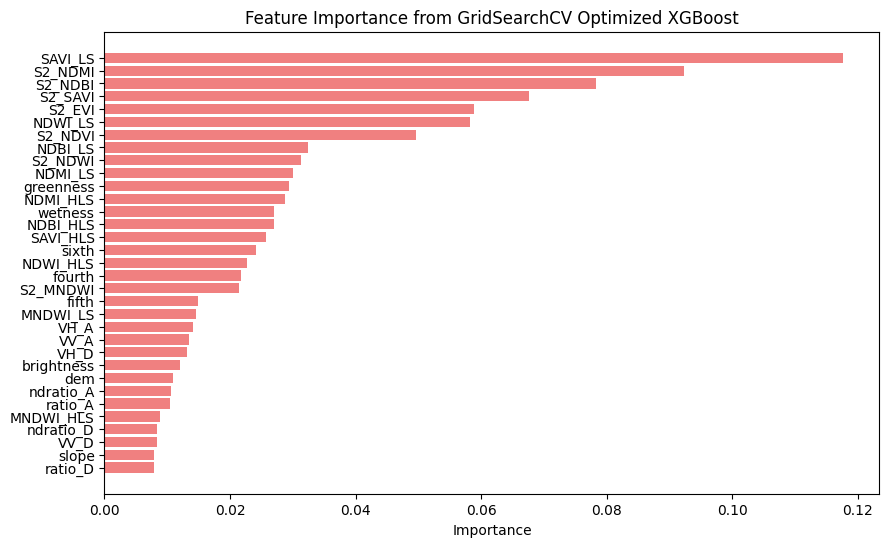

In [55]:
best_model = grid_rf.best_estimator_

# Get feature importance from the best model
feature_importance = best_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': x_train.columns.values, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightcoral')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance from GridSearchCV Optimized XGBoost')
plt.show()

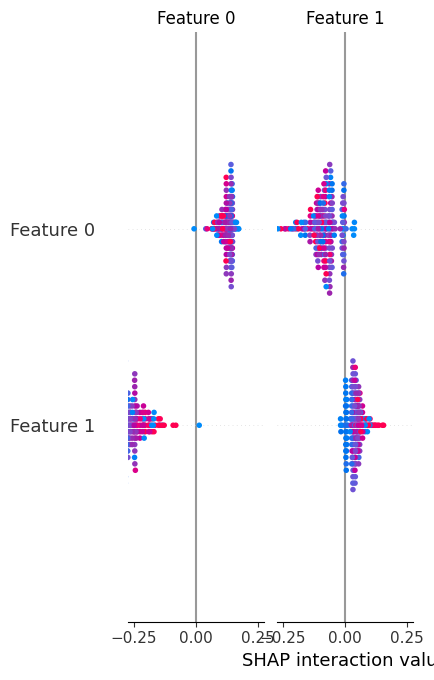

In [148]:

explainer = shap.TreeExplainer(best_model)
sample = shap.utils.sample(x_test.values, 200)
shap_values = explainer.shap_values(sample)
shap.summary_plot(shap_values, sample) # max_display=10

In [153]:
# shap.plots.beeswarm(shap_values)

TypeError: The beeswarm plot requires an `Explanation` object as the `shap_values` argument.

In [145]:
shap.plots.heatmap(shap_values[:1000])

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [56]:
# #shap approach

# best_model = grid_rf.best_estimator_
# explainer = shap.KernelExplainer(best_model.predict, x_train.values)

# ## sample just n num of total data set https://github.com/shap/shap/issues/1197
# shap_values = explainer.shap_values(x_train.values, nsamples=35)  ## currently working but very  very slow
# # shap_values = explainer.shap_values( shap.sample(x_train.values, 35) )

# shap.summary_plot(shap_values, x_train.values, plot_type="bar")

In [57]:

# Load a sample GeoTIFF image (update the file path as needed)
# image_path = '/content/drive/MyDrive/Colab_workspace/Stack_Reasmpled_10_16.tif'
# image = geemap.load_GeoTIFF(image_path)

image = ee.Image("projects/servir-sco-assets/assets/AIA_Project/stackedResampled")

# Define training data points (with example coordinates)
# land_class_1 = ee.Geometry.Point([longitude1, latitude1])
# land_class_2 = ee.Geometry.Point([longitude2, latitude2])

# Create labeled feature collection
training_data = ee.FeatureCollection("projects/servir-sco-assets/assets/AIA_Project/Wheat_training")

# Sample the image to create training data
training = image.sampleRegions(
    collection=training_data,
    properties=['cropland'],
    scale=10
)

# Train a Random Forest classifier
classifier = ee.Classifier.smileRandomForest(numberOfTrees=50).train(
    features=training,
    classProperty='cropland',
    inputProperties=image.bandNames()
)

# Apply the classifier to the image
classified = image.classify(classifier)

wheat_only = classified.select('classification').eq(1)
wheat_only_final_rf = classified.updateMask(wheat_only);
Map.addLayer(wheat_only_final_rf, {'min': 1, 'max': 1, 'palette': ["ffa630"]}, 'wheat_only_final_rf');
Map.centerObject(wheat_only_final_rf, 10)
# # Optional: Export classified image to Google Drive
# export_task = ee.batch.Export.image.toDrive(
#     image=classified,
#     description='Classified_Image',
#     folder='EarthEngineImages',
#     fileNamePrefix='classified_image',
#     scale=30,
#     region=image.geometry().bounds().getInfo()
# )
# export_task.start()

table = ee.FeatureCollection("projects/servir-sco-assets/assets/AIA_Project/Wheat_training_2023_Groundtruth")

fcPolygonSamp = classified.sampleRegions(**{
  'collection': table,
  'scale': 10,
  'geometries': True
});

Map.addLayer(fcPolygonSamp, {}, 'groundTruth_2023')


Map

Map(center=[41.22850160682466, -103.00127965843882], controls=(WidgetControl(options=['position', 'transparent…

In [58]:

# print("stat_sample", stat_sample)
stat_sample_df = geemap.ee_to_df(fcPolygonSamp)
# print("stat_sample_df", stat_sample_df)
y_true = stat_sample_df['cropland']
y_pred = stat_sample_df['classification']


print('F1-Score:', f1_score(y_true, y_pred))
print('Recall:', recall_score(y_true, y_pred))
print('Accuracy:',accuracy_score(y_true, y_pred))
print('Precision:',precision_score(y_true, y_pred))
print('classification_report',classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
cm

F1-Score: 0.07654723127035831
Recall: 0.047
Accuracy: 0.433
Precision: 0.20614035087719298
classification_report               precision    recall  f1-score   support

           0       0.46      0.82      0.59      1000
           1       0.21      0.05      0.08      1000

    accuracy                           0.43      2000
   macro avg       0.33      0.43      0.33      2000
weighted avg       0.33      0.43      0.33      2000



array([[819, 181],
       [953,  47]])

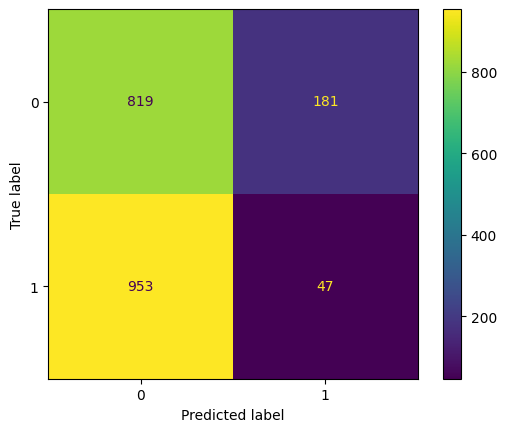

In [59]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot()

plt.show()

## XGBoost Classifer

In [60]:

param_grid = {'learning_rate' : [0.01], 'n_estimators' : [200], 'random_state': [5],'max_depth' : [9]}

# param_grid = {'learning_rate': [0.005, 0.01, 0.001],
#               'n_estimators': [50,100,200],
#               'random_state': [42],
#               'gamma': [5, 10],
#               'min_child_weight': [5, 10, 15],
#               'max_depth': [5, 10]}

# param_grid = {'learning_rate' : [0.005,0.01,0.001], 'n_estimators' : [40,200], 'random_state': [5],
#               'max_depth' : [4,9]}
grid_xgb = GridSearchCV(XGBClassifier(), param_grid, cv = folds, refit=True, verbose = 0, scoring = score_calc)
grid_xgb.fit(x_train.values, y_train['cropland'].values)

sc_xgb = get_best_score(grid_xgb)
pred_xgb = grid_xgb.predict(x_test.values)

0.9063333333333332
{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 200, 'random_state': 5}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=5, ...)


In [61]:
print('F1-Score:', f1_score(y_test, pred_xgb))
print('Recall:', recall_score(y_test, pred_xgb))
print('Accuracy:',accuracy_score(y_test, pred_xgb))
print('Precision:',precision_score(y_test, pred_xgb))
print('classification_report',classification_report(y_test, pred_xgb))
cm = confusion_matrix(y_test, pred_xgb)
cm

F1-Score: 0.9022704837117473
Recall: 0.914
Accuracy: 0.901
Precision: 0.8908382066276803
classification_report               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1500
           1       0.89      0.91      0.90      1500

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



array([[1332,  168],
       [ 129, 1371]])

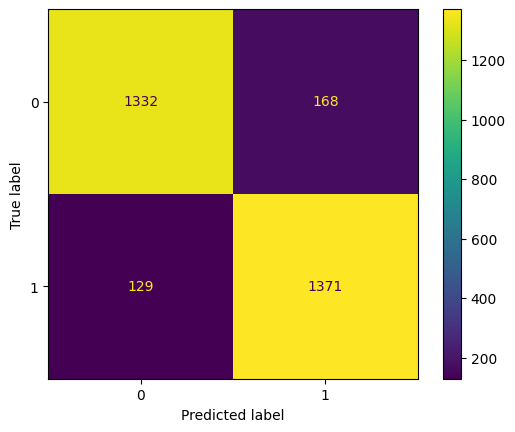

In [62]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot()

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

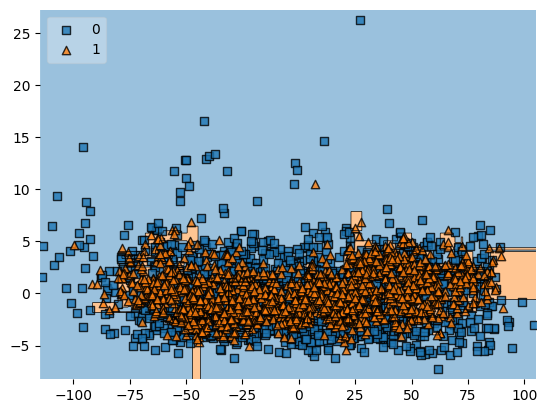

In [80]:
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train.values)
grid_xgb.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train["cropland"].values, clf=grid_xgb, legend=2)

plt.xlabel(X_train2.columns[0], size=14)
plt.ylabel(X_train2.columns[1], size=14)
plt.title('xgb Decision Region Boundary', size=16)

       Feature  Importance
16     SAVI_LS    0.245759
11     S2_NDMI    0.235763
2     NDBI_HLS    0.081778
10     S2_NDBI    0.056479
14     S2_SAVI    0.043156
30       sixth    0.028548
4     NDMI_HLS    0.024352
19        VV_A    0.022685
24      fourth    0.019878
25   greenness    0.019744
12     S2_NDVI    0.015931
17        VH_A    0.015110
18        VH_D    0.014284
32     wetness    0.013670
20        VV_D    0.012989
21  brightness    0.012056
6     NDWI_HLS    0.011782
23       fifth    0.011718
1     MNDWI_LS    0.011516
27   ndratio_D    0.011000
9     S2_MNDWI    0.010876
0    MNDWI_HLS    0.010834
7      NDWI_LS    0.010702
22         dem    0.009747
8       S2_EVI    0.009054
31       slope    0.008543
3      NDBI_LS    0.008504
26   ndratio_A    0.008459
13     S2_NDWI    0.008005
15    SAVI_HLS    0.006440
5      NDMI_LS    0.000639
28     ratio_A    0.000000
29     ratio_D    0.000000


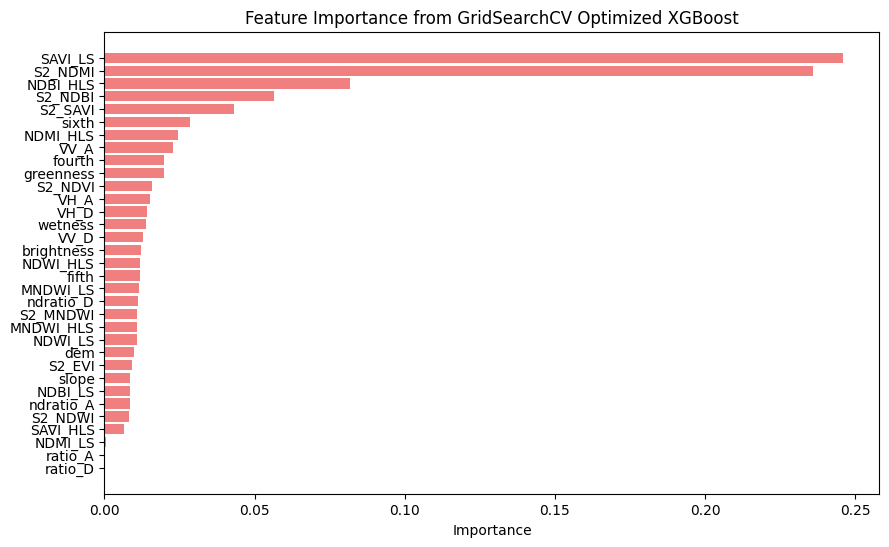

In [63]:
best_model = grid_xgb.best_estimator_

# Get feature importance from the best model
feature_importance = best_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': x_train.columns.values, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightcoral')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance from GridSearchCV Optimized XGBoost')
plt.show()

In [64]:
# image = ee.Image("projects/servir-sco-assets/assets/AIA_Project/stackedResampled")
# image_array = geemap.ee_to_xarray(image)
# image_array


In [65]:
# S2_NDVI= np.array(image_array['S2_NDVI'])

# S2_NDVI


In [66]:
# bandlist = x_test.columns.values

# for i in bandlist:
#   i = np.array(image_array[i])
#   image_pixels = np.dstack([i])#.reshape(-1, 1)
#   print("image_pixels", image_pixels)


# # b1 = np.array(image_array['MNDWI_HLS'])
# # ,image_array['NDBI_HLS'],
# # image_array['NDBI_LS'],
# # image_array['NDMI_HLS'],
# # image_array['NDMI_LS'],
# # image_array['NDMI_LS'],
# # image_array['NDWI_HLS'],
# # image_array['NDWI_LS'],
# # image_array['S2_EVI'],
# # image_array['S2_MNDWI'],
# # image_array['S2_NDBI'],
# # image_array['S2_NDMI'],
# # image_array['S2_NDVI'],
# # image_array['S2_NDWI'],
# # image_array['S2_SAVI'],
# # image_array['SAVI_HLS'],
# # image_array['SAVI_LS'],
# # image_array['VH_A'],
# # image_array['VH_D'],
# # image_array['VV_A'],
# # image_array['VV_D'],
# # image_array['brightness'],
# # image_array['dem'],
# # image_array['fifth'],
# # image_array['fourth'],
# # image_array['greenness'],
# # image_array['ndratio_A'],
# # image_array['ndratio_D'],
# # image_array['ratio_A'],
# # image_array['ratio_D'],
# # image_array['sixth'],
# # image_array['slope'],
# # image_array['wetness']
# # )

# # image_pixels = np.dstack([B2, B3, B4, B8]).reshape(-1, 4)

In [67]:
# # image = ee.Image("projects/servir-sco-assets/assets/AIA_Project/stackedResampled")
# # # Create labeled feature collection
# # training_data = ee.FeatureCollection("projects/servir-sco-assets/assets/AIA_Project/Wheat_training")

# roi = ee.Geometry.Polygon(
#   [
#     [-103.28140570322613,41.04865218168774],
#     [-102.72110296885113,41.04865218168774],
#     [-102.72110296885113,41.40807785446098],
#     [-103.28140570322613,41.40807785446098],
#     [-103.28140570322613,41.04865218168774],
#   ]
# );
# # # Sample pixel values over the entire region at a lower resolution (scale=100 meters)
# # image_array = image.sampleRectangle(region=roi, defaultValue=0).getInfo()
# # print("image_array", image_array)

# # Convert image to NumPy array for model prediction

# # image_data = x_test.columns.values

# b1 = np.array(image_array['MNDWI_HLS'])
# # image_pixels = np.dstack([B2, B3, B4, B8]).reshape(-1, 4)
# # image_pixels = np.squeeze(image_data)

# # image_data = np.array([image_array['1'], image_array['B3'], image_array['B4'], image_array['B8']])
# # image_pixels  = image_data.reshape(-1, 33)  # Reshape for prediction

# ###############
# #swap out with real model from above
# # Initialize and train XGBoost classifier
# model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
# model.fit(x_train.values, y_train['cropland'].values)

# # grid_xgb = GridSearchCV(XGBClassifier(), param_grid, cv = folds, refit=True, verbose = 0, scoring = score_calc)
# # grid_xgb.fit(x_train.values, y_train['cropland'].values)

# # Make predictions
# y_pred = model.predict(x_test.values)
# ################


# # Reshape the predictions back to the original image dimensions
# prediction_map = y_pred.reshape(S2_NDVI.shape)

# # Convert the prediction map to an Earth Engine Image
# classification_image = geemap.numpy_to_ee(np.array(prediction_map), roi, crs='EPSG:4326', scale=100)

# # Visualize the classification result on the map
# Map.addLayer(classification_image, {}, 'Classification Result')
# Map



In [68]:
# import xgboost as xgb

# image = ee.Image("projects/servir-sco-assets/assets/AIA_Project/stackedResampled")

# # Create labeled feature collection
# training_data = ee.FeatureCollection("projects/servir-sco-assets/assets/AIA_Project/Wheat_training")

# # Sample the image to create training data
# training = image.sampleRegions(
#     collection=training_data,
#     properties=['cropland'],
#     scale=10
# )

# # # Convert to pandas DataFrame
# df = train_copy

# # # Prepare features and labels for XGBoost :['system:index', 'cropland', 'random', '.geo'])
# X = df.drop(columns=['system:index','cropland', 'random', '.geo'])
# y = df['cropland']

# # # Train XGBoost model
# dtrain = xgb.DMatrix(X, label=y)
# # params = {'objective': 'binary:logistic', 'max_depth': 6, 'eta': 0.3, 'eval_metric': 'logloss'}

# # dtrain = xgb.DMatrix(x_train.values, y_train['cropland'].values)

# params =  {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 200, 'random_state': 5}
# num_round = 100
# bst = xgb.train(params, dtrain, num_round)

# # Sample all pixel values from the image
# pixels = image.sample(region=image.geometry(), scale=1000, projection=image.projection(), geometries=False)
# pixel_df = geemap.ee_to_df(pixels)

# Map.addLayer(pixels, {}, "pixels")

# # Predict using the trained XGBoost model
# # pixel_values = pixel_df.drop(columns=['system:index']) #MNDWI_HLS   system:index
# # print("pixel_values", pixel_values)

# # dpredict = xgb.DMatrix(pixel_values)
# dpredict = xgb.DMatrix(pixel_df)
# predictions = bst.predict(dpredict)

# # Add predictions to DataFrame and convert back to Earth Engine FeatureCollection

# pixel_df['predictions'] = predictions
# # classified_fc = geemap.ee_to_df(pixel_df)

# # ee_to_pandas()
# # ee_to_geopandas()
# # csv_to_pandas()
# # shp_to_geopandas()

# # classified_fc = geemap.pandas_to_ee(pixel_df)


# # Convert predictions to an image
# # classified_image = classified_fc.reduceToImage(properties=['predictions'], reducer=ee.Reducer.first())
# classified_image = pixel_df['predictions'].reduceToImage(properties=['predictions'], reducer=ee.Reducer.first())


# # Visualize the results
# Map = geemap.Map(classified_image, zoom=10)
# Map.addLayer(image, {}, 'Original Image')
# Map.addLayer(classified_image, {'min': 0, 'max': 1, 'palette': ['red', 'green']}, 'Classified')
# Map


## MLP Classifier

In [69]:
param_grid = {'activation': ['logistic'], 'alpha': [5e-05], 'hidden_layer_sizes': [(50,)], 'learning_rate_init': [0.001],'random_state': [5], 'solver': ['lbfgs']}

# param_grid = {"hidden_layer_sizes": [(1,),(50,)],
#               "activation": ["identity", "logistic", "tanh", "relu"],
#               "solver": ["lbfgs", "sgd", "adam"],
#               "alpha": [0.00005,0.0005],
#               'learning_rate_init': [0.001, 0.01, 0.1, 1],
#               'random_state': [42]}

grid_mlp = GridSearchCV(MLPClassifier(), param_grid, cv = folds, refit=True, verbose = True, scoring = score_calc)
grid_mlp.fit(x_train_norm, y_train['cropland'].values)

sc_mlp = get_best_score(grid_mlp)
pred_mlp = grid_mlp.predict(x_test_norm)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.9116666666666667
{'activation': 'logistic', 'alpha': 5e-05, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'random_state': 5, 'solver': 'lbfgs'}
MLPClassifier(activation='logistic', alpha=5e-05, hidden_layer_sizes=(50,),
              random_state=5, solver='lbfgs')


In [70]:
print('F1-Score:', f1_score(y_test, pred_mlp))
print('Recall:', recall_score(y_test, pred_mlp))
print('Accuracy:',accuracy_score(y_test, pred_mlp))
print('Precision:',precision_score(y_test, pred_mlp))
print('classification_report',classification_report(y_test, pred_mlp))
cm = confusion_matrix(y_test, pred_mlp)
cm

F1-Score: 0.785227867993714
Recall: 0.9993333333333333
Accuracy: 0.7266666666666667
Precision: 0.6466781708369284
classification_report               precision    recall  f1-score   support

           0       1.00      0.45      0.62      1500
           1       0.65      1.00      0.79      1500

    accuracy                           0.73      3000
   macro avg       0.82      0.73      0.70      3000
weighted avg       0.82      0.73      0.70      3000



array([[ 681,  819],
       [   1, 1499]])

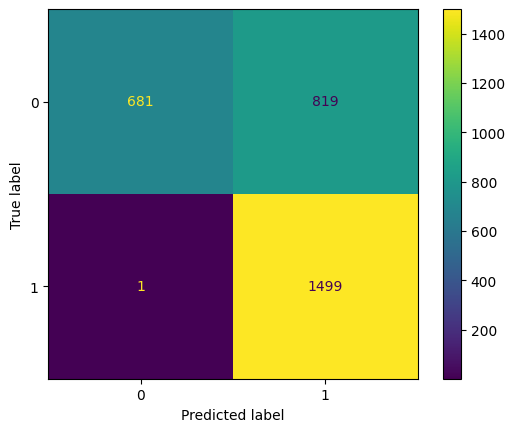

In [71]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot()

plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

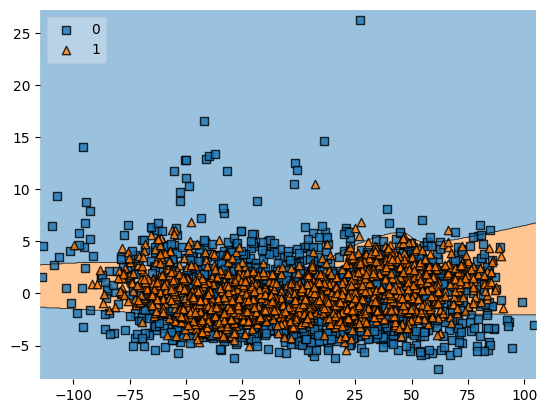

In [81]:
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train.values)
grid_mlp.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train["cropland"].values, clf=grid_mlp, legend=2)

plt.xlabel(X_train2.columns[0], size=14)
plt.ylabel(X_train2.columns[1], size=14)
plt.title('mlp Decision Region Boundary', size=16)

       Feature  Importance
16     SAVI_LS    0.359600
12     S2_NDVI    0.206967
10     S2_NDBI    0.056567
8       S2_EVI    0.047000
9     S2_MNDWI    0.034500
21  brightness    0.032567
7      NDWI_LS    0.032500
5      NDMI_LS    0.031267
15    SAVI_HLS    0.023500
19        VV_A    0.023467
1     MNDWI_LS    0.016200
23       fifth    0.014933
25   greenness    0.013900
32     wetness    0.013733
4     NDMI_HLS    0.012467
3      NDBI_LS    0.012200
6     NDWI_HLS    0.011267
27   ndratio_D    0.011233
13     S2_NDWI    0.010733
20        VV_D    0.010433
22         dem    0.008033
11     S2_NDMI    0.007967
14     S2_SAVI    0.007500
30       sixth    0.004533
29     ratio_D    0.004367
31       slope    0.004000
0    MNDWI_HLS    0.003533
17        VH_A    0.003033
26   ndratio_A    0.002367
18        VH_D    0.001367
2     NDBI_HLS    0.000700
28     ratio_A    0.000600
24      fourth   -0.000700


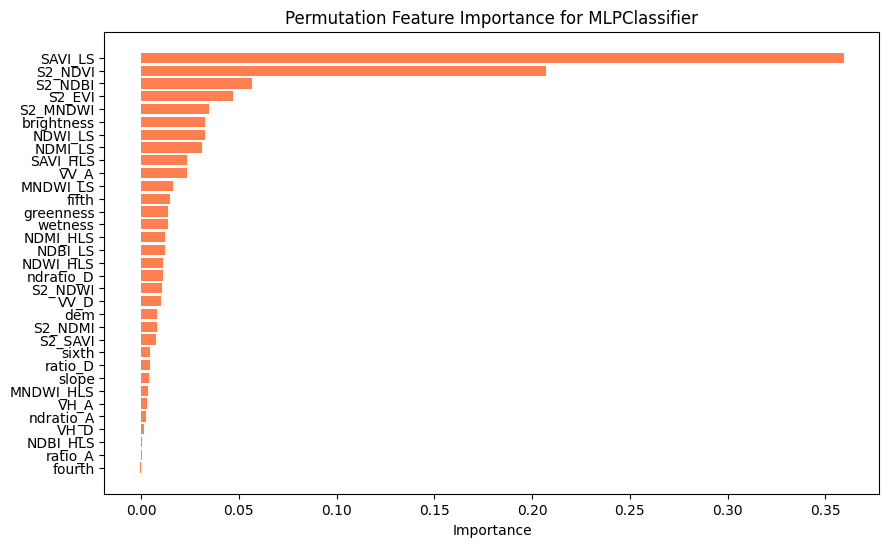

In [72]:
best_model = grid_mlp.best_estimator_

# Calculate permutation feature importance
perm_importance = permutation_importance(best_model, x_train_norm, y_train['cropland'].values, n_repeats=10, random_state=42)

# Get feature importance into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': x_test.columns.values,
    'Importance': perm_importance.importances_mean
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='coral')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Permutation Feature Importance for MLPClassifier')
plt.show()

In [73]:
# Step 1: Install necessary packages
# !pip install geemap
# !pip install earthengine-api
# !pip install scikit-learn

# # Step 2: Import libraries and authenticate GEE
# import geemap
# import ee
# import numpy as np
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import train_test_split

# ee.Authenticate()
# ee.Initialize()

# # Step 3: Load and prepare remote sensing data
# roi = ee.Geometry.Polygon(
#     [[[-122.5957, 37.5331],
#       [-122.5957, 37.1782],
#       [-121.9366, 37.1782],
#       [-121.9366, 37.5331]]], None, False)

# sentinel2 = ee.ImageCollection('COPERNICUS/S2') \
#     .filterDate('2020-01-01', '2020-12-31') \
#     .filterBounds(roi) \
#     .median()

# bands = ['B4', 'B3', 'B2', 'B8']
# image = sentinel2.select(bands).clip(roi)

# # Step 4: Sample data and prepare for MLP
# points = image.sample(region=roi, numPixels=500, scale=30, geometries=True)

# def prepare_data(points):
#     features = []
#     labels = []
#     points_list = points.getInfo()['features']
#     for point in points_list:
#         properties = point['properties']
#         features.append([properties['B4'], properties['B3'], properties['B2'], properties['B8']])
#         labels.append(np.random.randint(0, 2))  # Random binary labels
#     return np.array(features), np.array(labels)

# features, labels = prepare_data(points)
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)




image = ee.Image("projects/servir-sco-assets/assets/AIA_Project/stackedResampled")

# Create labeled feature collection
training_data = ee.FeatureCollection("projects/servir-sco-assets/assets/AIA_Project/Wheat_training")

# Sample the image to create training data
training = image.sampleRegions(
    collection=training_data,
    properties=['cropland'],
    scale=10
)



# # Step 5: Train MLP classifier
# mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
# mlp.fit(X_train, y_train)

# score = mlp.score(X_test, y_test)
# print(f"Accuracy of the MLP model: {score * 100:.2f}%")

# Step 6: Apply classification to the entire image
def classify_pixel(pixel_values):
    pixel_array = np.array(pixel_values).reshape(1, -1)
    return int(grid_mlp.predict(pixel_array)[0])

classified_image = image.expression(
    "b('MNDWI_HLS')",
    {
        'MNDWI_HLS': image.select('MNDWI_HLS'),
        # 'B3': image.select('B3'),
        # 'B2': image.select('B2'),
        # 'B8': image.select('B8'),
    }
).map(classify_pixel)

# Step 7: Display the classified map
Map = geemap.Map(center=[37.4, -122.0], zoom=10)
Map.addLayer(image, {'bands': ['B4', 'B3', 'B2'], 'max': 3000}, "Sentinel-2")
Map.addLayer(classified_image, {'min': 0, 'max': 1, 'palette': ['red', 'green']}, "MLP Classification")
Map.addLayerControl()
Map



AttributeError: 'Image' object has no attribute 'map'

## FCNN

In [17]:
# Load the image from GEE
image = ee.Image("projects/servir-sco-assets/assets/AIA_Project/stackedResampled")

# Get the bounds of the image region
bounds = image.geometry().bounds()
info = bounds.getInfo()
xmin, ymin, xmax, ymax = info['coordinates'][0][0][0], info['coordinates'][0][0][1], info['coordinates'][0][2][0], info['coordinates'][0][2][1]

print("Bounding box coordinates:", xmin, ymin, xmax, ymax)


Bounding box coordinates: -103.28153923911775 41.04856164367958 -102.72102007183715 41.40853816208965


In [18]:
# Define number of rows and columns for the grid
n_rows = 10
n_cols = 10

# Calculate width and height of each chunk
x_step = (xmax - xmin) / n_cols
y_step = (ymax - ymin) / n_rows

# Create a list of regions (bounding boxes) for each chunk
regions = []
for row in range(n_rows):
    for col in range(n_cols):
        x0 = xmin + col * x_step
        x1 = xmin + (col + 1) * x_step
        y0 = ymin + row * y_step
        y1 = ymin + (row + 1) * y_step
        region = ee.Geometry.Rectangle([x0, y0, x1, y1])
        regions.append(region)

print(f"Number of regions: {len(regions)}")  # Should be 100



Number of regions: 100


In [ ]:
#################################This runs great just dont need everytime

# import os
# from geemap import ee_export_image

# # Define the output directory
# output_dir = '/content/drive/MyDrive/Colab_workspace'

# # Export each chunk as a GeoTIFF
# for i, region in enumerate(regions):
#     output_file = f'stackedResampled_chunk_{i + 1}.tif'
#     # Export each region
#     ee_export_image(image, filename=os.path.join(output_dir, output_file), scale=10, region=region)
#     print(f"Exported chunk {i + 1} to {output_file}")


In [ ]:
#################################This runs great just dont need everytime

# import rasterio
# import numpy as np
# from rasterio.merge import merge
# import glob

# # Define the file paths of the exported chunks
# file_paths = [os.path.join(output_dir, f'stackedResampled_chunk_{i + 1}.tif') for i in range(100)]

# # Open the chunks
# src_files_to_mosaic = []
# for path in file_paths:
#     src = rasterio.open(path)
#     src_files_to_mosaic.append(src)

# # Merge the chunks into one
# mosaic, out_trans = merge(src_files_to_mosaic)

# # Update the metadata
# out_meta = src.meta.copy()
# out_meta.update({
#     "driver": "GTiff",
#     "height": mosaic.shape[1],
#     "width": mosaic.shape[2],
#     "transform": out_trans
# })

# # Save the reassembled image
# output_file = os.path.join(output_dir, "reassembled_image.tif")
# with rasterio.open(output_file, "w", **out_meta) as dest:
#     dest.write(mosaic)

# print(f"Reassembled image saved to {output_file}")



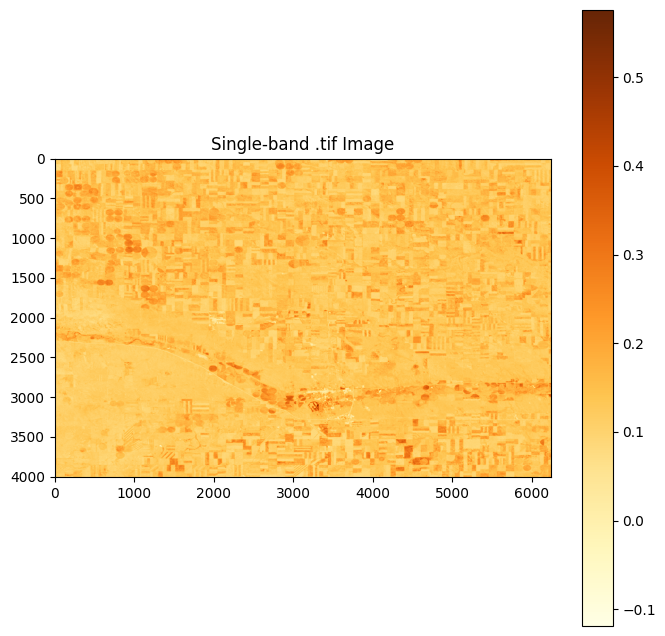

In [19]:
# Load remote sensing image using rasterio
image_path = 'reassembled_image.tif'  # Replace with your image path

with rasterio.open(image_path) as dataset:
    test_image = dataset.read()  # Reads all bands into a 3D NumPy array

# Single-band image (e.g., grayscale or elevation data)
plt.figure(figsize=(8, 8))
plt.imshow(test_image[0], cmap='YlOrBr')  # Assuming it's a single-band image, use 'image[0]' to access the first band
plt.title('Single-band .tif Image')
plt.colorbar()
plt.show()

In [20]:
output_file = 'reassembled_image.tif'
output_dir = '/content/drive/MyDrive/Colab_workspace'


# Load the exported GeoTIFF file
with rasterio.open(os.path.join(output_dir, output_file)) as dataset:
    image_data = dataset.read()  # Read the image data
    meta = dataset.meta  # Store metadata

# Check the shape of the image
print("Image shape:", image_data.shape)  # (channels, height, width)


Image shape: (33, 4008, 6240)


In [21]:
def create_patches(image_data, patch_size):
    patches = []
    channels, height, width = image_data.shape

    # Loop through the image and extract patches
    for i in range(0, height - patch_size + 1, patch_size):
        for j in range(0, width - patch_size + 1, patch_size):
            patch = image_data[:, i:i + patch_size, j:j + patch_size]  # Extract the patch
            patches.append(patch)
            if len(patches) >= 20:  # Limit to 20 patches
                return patches

    return patches

# Create patches from the image
patches = create_patches(image_data,128)
# print(patches)
# Check the number of patches created
print("Number of patches created:", len(patches))


Number of patches created: 20


## CNN

In [22]:
# Load the exported GeoTIFF file
with rasterio.open(os.path.join(output_dir, output_file)) as dataset:
    image_data = dataset.read()  # Read the image data
    meta = dataset.meta  # Store metadata

# Preprocess the image
image_data = np.moveaxis(image_data, 0, -1)  # Move channels to the last dimension
image_data = image_data / 255.0  # Normalize pixel values to [0, 1]

# Check the shape of the image
print("Image shape:", image_data.shape)  # (height, width, channels)


Image shape: (4008, 6240, 33)


In [ ]:
# # Generating synthetic labels (for demonstration)
# # Assuming 2 classes for simplicity, let's say class 0 and class 1
# num_classes = 2
# height, width, channels = image_data.shape
# print(height)
# print(width)
# print(channels)
# num_samples = 1000  # Number of samples for training

# # Create synthetic training data (random samples from the image)
# X_train = []
# y_train = []

# for _ in range(num_samples):
#     x = np.random.randint(0, height)
#     y = np.random.randint(0, width)
#     X_train.append(image_data[x, y])
#     y_train.append(np.random.randint(0, num_classes))  # Randomly assign classes

# X_train = np.array(X_train)
# y_train = np.array(y_train)

# # Reshape for CNN input
# X_train = X_train.reshape(-1, channels)

# # Check the shape of training data
# print("Training data shape:", X_train.shape)
# print("Training labels shape:", y_train.shape)

In [23]:
height, width, channels = image_data.shape
num_classes = 2

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))


In [37]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 4006, 6238, 32)      │           9,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2003, 3119, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 2001, 3117, 64)      │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 1000, 1558, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 998, 1556, 64)       │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 998, 1556, 2)        │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,090 (254.26 KB)

 Trainable params: 65,090 (254.26 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# history = model.fit(train_images, train_labels, epochs=10,
#                     validation_data=(test_images, test_labels))

history = model.fit(x_train.values, y_train['cropland'].values, epochs=10, batch_size=5)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(5, 33), dtype=float32). Expected shape (None, 4008, 6240, 33), but input has incompatible shape (5, 33)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(5, 33), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# Evaluate the model on the same data (for demonstration purposes)
loss, accuracy = model.evaluate(x_train.values, y_train['cropland'].values)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

# Cross model comp

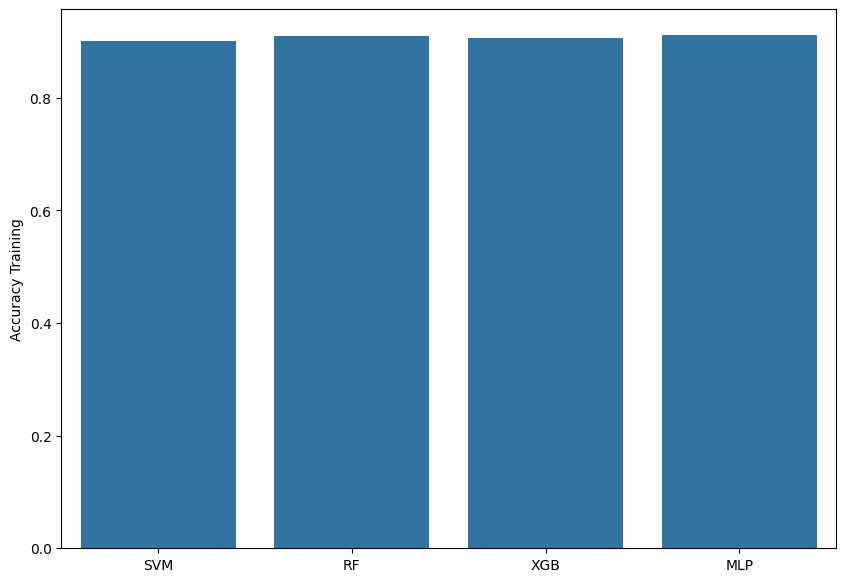

In [83]:
list_scores = [sc_svc, sc_rf, sc_xgb, sc_mlp]
list_predictions = [pred_svc, pred_rf, pred_xgb, pred_mlp]
list_regressors = ['SVM','RF','XGB','MLP']
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.ylabel('Accuracy Training')
plt.show()

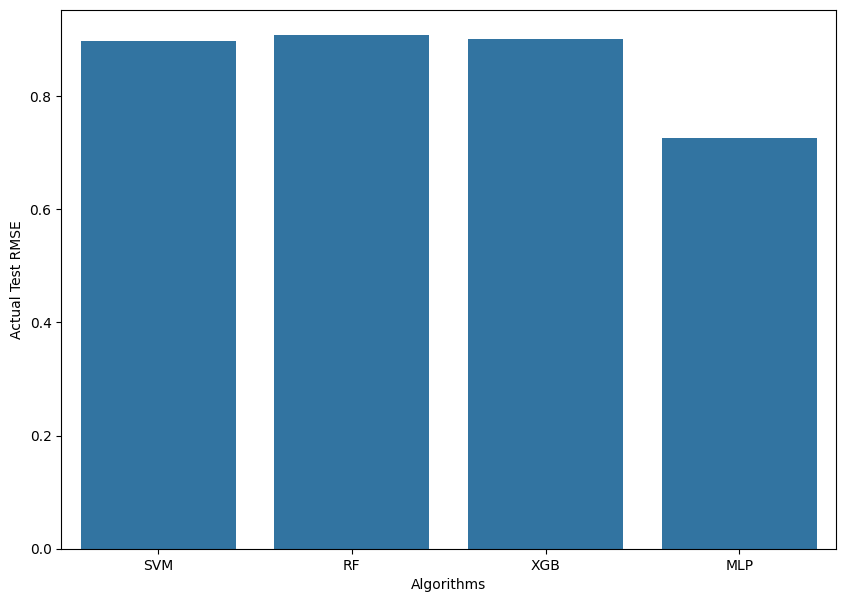

In [84]:
errors = []
for pred in list_predictions:
    errors.append(accuracy_score(y_test,pred))


regressors = ['SVM','RF','XGB','MLP']
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x = regressors, y = errors, ax=ax)
plt.ylabel('Actual Test RMSE')
plt.xlabel('Algorithms')
plt.show()

In [85]:
predictions = {'SVM': pred_svc,
               'RF': pred_rf,
               'XGB': pred_xgb,
               'MLP':pred_mlp }
df_predictions = pd.DataFrame(data=predictions)

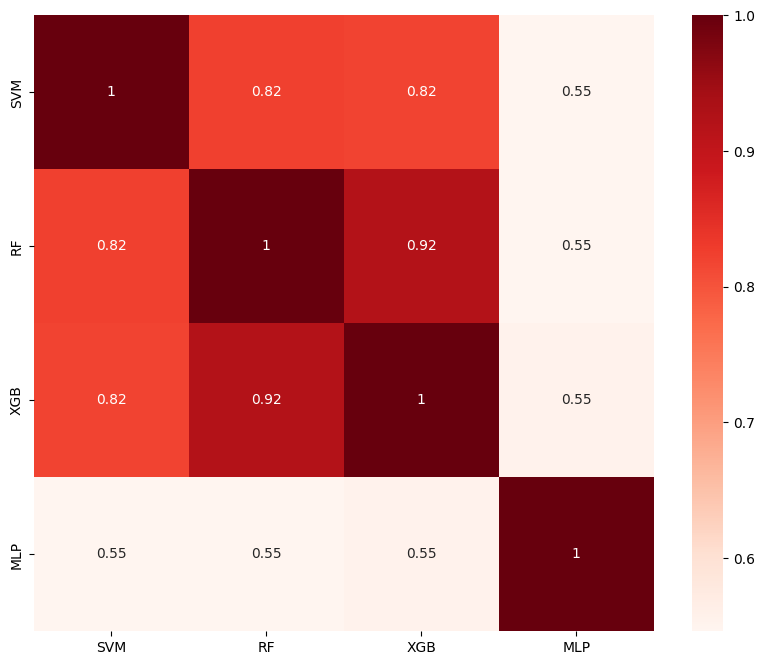

In [86]:
plt.figure(figsize=(10,8))
cor_pred = df_predictions.corr()
sns.heatmap(cor_pred, annot=True, cmap=plt.cm.Reds)
plt.show()

# Meta Model Approach

In [91]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html
#https://github.com/dataprofessor/python/blob/main/Stacking_Classifier.ipynb

estimators =[('svm', grid_svc),
              ('rf', grid_rf),
              ('xgb',grid_xgb),
              ('mlp', grid_mlp)
]


stack_model = StackingClassifier(
    estimators=estimators, final_estimator= RandomForestClassifier(n_estimators=10, random_state=42)
)



In [92]:
# Train stacked model
stack_model.fit(x_train.values, y_train['cropland'].values)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.870 total time=   0.9s
[CV 2/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.857 total time=   1.4s
[CV 3/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.858 total time=   1.2s
[CV 4/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.850 total time=   1.2s
[CV 5/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.832 total time=   1.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.918 total time=   1.4s
[CV 2/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.910 total time=   1.4s
[CV 3/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.903 total time=   1.4s
[CV 4/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.922 total 

StackingClassifier(estimators=[('svm',
                                GridSearchCV(cv=5, estimator=SVC(),
                                             param_grid={'C': [10],
                                                         'coef0': [0.01],
                                                         'degree': [3],
                                                         'gamma': [0.1],
                                                         'kernel': ['linear']},
                                             scoring='accuracy', verbose=3)),
                               ('rf',
                                GridSearchCV(cv=5,
                                             estimator=RandomForestClassifier(),
                                             param_grid={'min_samples_split': [3],
                                                         'n_estimators': [150],
                                                         'random_state': [5]},
                                             scoring='accuracy', verbose=...
                                                         'random_state': [5]},
                                             scoring='accuracy')),
                               ('mlp',
                                GridSearchCV(cv=5, estimator=MLPClassifier(),
                                             param_grid={'activation': ['logistic'],
                                                         'alpha': [5e-05],
                                                         'hidden_layer_sizes': [(50,)],
                                                         'learning_rate_init': [0.001],
                                                         'random_state': [5],
                                                         'solver': ['lbfgs']},
                                             scoring='accuracy',
                                             verbose=True))],
                   final_estimator=RandomForestClassifier(n_estimators=10,
                                                          random_state=42))

In [93]:
stack_model_feat = stack_model.get_feature_names_out()
stack_model_feat


array(['stackingclassifier_svm', 'stackingclassifier_rf',
       'stackingclassifier_xgb', 'stackingclassifier_mlp'], dtype=object)

In [94]:
stack_model_params = stack_model.get_params(deep=True)
stack_model_params

{'cv': None,
 'estimators': [('svm', GridSearchCV(cv=5, estimator=SVC(),
                param_grid={'C': [10], 'coef0': [0.01], 'degree': [3],
                            'gamma': [0.1], 'kernel': ['linear']},
                scoring='accuracy', verbose=3)),
  ('rf',
   GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                param_grid={'min_samples_split': [3], 'n_estimators': [150],
                            'random_state': [5]},
                scoring='accuracy', verbose=3)),
  ('xgb',
   GridSearchCV(cv=5,
                estimator=XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None, device=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False, eval_metric=None,
                       

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.477 total time=   3.1s
[CV 2/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.510 total time=   4.7s
[CV 3/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.480 total time=   2.9s
[CV 4/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.488 total time=   6.3s
[CV 5/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.477 total time=   3.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.582 total time=   0.6s
[CV 2/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.577 total time=   0.6s
[CV 3/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.597 total time=   0.6s
[CV 4/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=0.600 total 

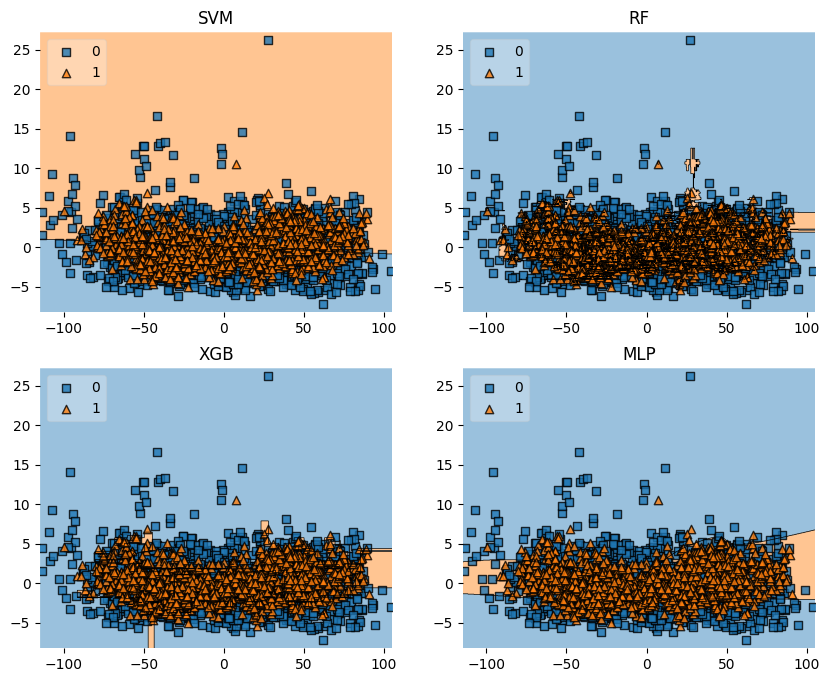

In [95]:
# # Initializing Classifiers
# clf1 = LogisticRegression(random_state=0)
# clf2 = RandomForestClassifier(random_state=0)
# clf3 = SVC(random_state=0, probability=True)
# eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
#                               weights=[2, 1, 1], voting='soft')



pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train.values)


X = X_train2
y = y_train["cropland"].values
# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

# labels = ['Logistic Regression',
#           'Random Forest',
#           'RBF kernel SVM',
#           'Ensemble']

labels = ['SVM','RF','XGB','MLP', "Meta"]


# grid_svc, grid_rf, grid_xgb, grid_mlp

for clf, lab, grd in zip([grid_svc, grid_rf, grid_xgb, grid_mlp, stack_model],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [ ]:
# fn = list(x_train.columns.values)

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,12), dpi=800)
# tree.plot_tree(stack_model.estimators_[0],
#                feature_names = fn,
#                class_names=['rh100'],
#                filled = True);
# fig.savefig('stack_model_individualtree.png')

In [ ]:
# sorted_idx = stack_model.feature_importances_.argsort()
# plt.barh(stack_model.feature_importances_[sorted_idx])
# plt.xlabel("stack_model Feature Importance")

## Shap viz

https://medium.com/analytics-vidhya/shap-part-2-kernel-shap-3c11e7a971b1

In [ ]:
# ## use the full dataset to viz
# explainer = shap.KernelExplainer(stack_model.predict, x_train.values)
# shap_values = explainer.shap_values(x_train.values)
# shap.summary_plot(shap_values, x_train.values, plot_type="bar")

##
explainer = shap.KernelExplainer(stack_model.predict, x_train.values)


## sample just n num of total data set https://github.com/shap/shap/issues/1197
#shap_values = explainer.shap_values(x_train.values, nsamples=35)  ## currently working but very  very slow
shap_values = explainer.shap_values( shap.sample(x_train.values, 35) )

shap.summary_plot(shap_values, x_train.values, plot_type="bar")

In [ ]:
# Make predictions
y_train_pred_stack = stack_model.predict(x_train.values)
y_test_pred_stack = stack_model.predict(x_test.values)

In [ ]:
# Training set model performance
print('F1-Score:', f1_score(y_train, y_train_pred_stack))
print('Recall:', recall_score(y_train, y_train_pred_stack))
print('Accuracy:',accuracy_score(y_train, y_train_pred_stack))
print('Precision:',precision_score(y_train, y_train_pred_stack))
print('classification_report',classification_report(y_train, y_train_pred_stack))
cm = confusion_matrix(y_train, y_train_pred_stack)
cm

In [ ]:
# Test set model performance
print('F1-Score:', f1_score(y_test,y_test_pred_stack))
print('Recall:', recall_score(y_test,y_test_pred_stack))
print('Accuracy:',accuracy_score(y_test,y_test_pred_stack))
print('Precision:',precision_score(y_test,y_test_pred_stack))
print('classification_report',classification_report(y_test,y_test_pred_stack))
cm = confusion_matrix(y_test,y_test_pred_stack)
cm

Validation

In [ ]:
y_val_pred_stack = stack_model.predict(x_validation.values)

In [ ]:
# Training set model performance
print('F1-Score:', f1_score(y_validation,y_val_pred_stack))
print('Recall:', recall_score(y_validation,y_val_pred_stack))
print('Accuracy:',accuracy_score(y_validation,y_val_pred_stack))
print('Precision:',precision_score(y_validation,y_val_pred_stack))
print('classification_report',classification_report(y_validation,y_val_pred_stack))
cm = confusion_matrix(y_validation,y_val_pred_stack)
cm

In [ ]:

# # Initialize base models
# rf = RandomForestRegressor(n_estimators=50, random_state=42)
# knn = KNeighborsRegressor(n_neighbors=5)
# lr = LinearRegression()

# # Fit base models on training data
# rf.fit(x_train, y_train['rh100'])
# knn.fit(x_train, y_train)
# lr.fit(x_train, y_train)

# # Generate base model predictions on training and validation data
# rf_pred_train = rf.predict(x_train)
# knn_pred_train = knn.predict(x_train)
# lr_pred_train = lr.predict(x_train)

# rf_pred_val = rf.predict(x_test)
# knn_pred_val = knn.predict(x_test)
# lr_pred_val = lr.predict(x_test)

test

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

In [ ]:
# # Combine base model predictions into meta features
# meta_features_train = np.column_stack((rf_pred_train, knn_pred_train, lr_pred_train))
# meta_features_val = np.column_stack((rf_pred_val, knn_pred_val, lr_pred_val))

# # Initialize meta model
# ridge = Ridge(alpha=0.5)

In [ ]:
# # Fit meta model on meta features and training target variable
# ridge.fit(meta_features_train, y_train)

# # Generate meta model predictions on validation set
# meta_pred_val = ridge.predict(meta_features_val)

# from sklearn.metrics import mean_squared_error

# # Calculate MSE on validation set
# mse = mean_squared_error(y_test, meta_pred_val)
# print("MSE on validation set: {:.4f}".format(mse))


# print("MAE train on test",mean_absolute_error(y_test, meta_pred_val))

# print("MSE train on test",mean_squared_error(y_test, meta_pred_val))

# r2 = r2_score(y_test, meta_pred_val)
# print("R2 train on test", r2)

# print("RMSE train on test",np.log(np.sqrt(mean_squared_error(y_test, meta_pred_val))))

In [ ]:
# meta_pred_val

In [ ]:
# rf_test_plot_df = pd.DataFrame({'y_test':y_test['rh100'], 'pred':meta_pred_val})
# # rf_test_plot_df.plot('y_test', 'pred', kind='scatter')

# sns.regplot(data=rf_test_plot_df,x = 'y_test', y = 'meta_pred_val',  ci=99, marker="x", color=".3", line_kws=dict(color="r"))

# Syntheis Stats

https://rasbt.github.io/mlxtend/user_guide/evaluate/cochrans_q/

In [120]:
from mlxtend.evaluate import cochrans_q
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar

Assuming a significance level α=0.05 we can conduct Cochran's Q test as follows, to test the null hypothesis there is no difference between the classification accuracies

Test all models

In [126]:
pred_list = [y_train["cropland"].values, pred_svc,pred_rf,pred_xgb, pred_mlp]

def all_models_cochran_q_test(a, b, c, d, e, alpha=0.05):
      q, p_value = cochrans_q(a,b,c,d,e)

      print('Q: %.3f' % q)
      print('p-value: %.3f' % p_value)

      # Determine if p-value is significant
      if p_value < alpha:
          print(f"The result is significant at alpha = {alpha}")
      else:
          print(f"The result is NOT significant at alpha = {alpha}")

all_models_cochran_q_test(y_train["cropland"].values, pred_svc, pred_rf, pred_xgb, pred_mlp)

Q: 822.570
p-value: 0.000
The result is significant at alpha = 0.05


REPEAT: Now test combinations of all models to tell differences

In [125]:
def cochran_q_test(a, b, c, alpha=0.05):
      chi2, p_value = cochrans_q(a,b,c)

      print('Cochran\'s Q Chi^2: %.3f' % chi2)
      print('Cochran\'s Q p-value: %.3f' % p_value)

      # Determine if p-value is significant
      if p_value < alpha:
          print(f"The result is significant at alpha = {alpha}")
      else:
          print(f"The result is NOT significant at alpha = {alpha}")

cochran_q_test(y_train["cropland"].values, pred_svc, pred_rf)

Cochran's Q Chi^2: 2.947
Cochran's Q p-value: 0.086
The result is NOT significant at alpha = 0.05


In [124]:
def mcnemar_test(a, b, c, alpha=0.05):
      chi2, p_value = mcnemar(mcnemar_table(a,b,c), corrected=False)

      print('McNemar\'s Chi^2: %.3f' % chi2)
      print('McNemar\'s p-value: %.3f' % p_value)

      # Determine if p-value is significant
      if p_value < alpha:
          print(f"The result is significant at alpha = {alpha}")
      else:
          print(f"The result is NOT significant at alpha = {alpha}")

mcnemar_test(y_train["cropland"].values, pred_svc, pred_rf)

McNemar's Chi^2: 2.947
McNemar's p-value: 0.086
The result is NOT significant at alpha = 0.05


# Agreement Map

In [ ]:
wheat_only_final_rf